Using TensorFlow backend.
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In value[[3L]](cond) :
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  "getThreads" not available for .C() for package "RevoUtilsMath"

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: 
  warnings.warn

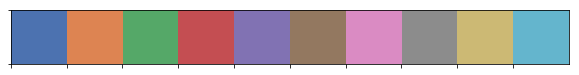

In [1]:
# compute
import numpy as np
import pandas as pd
# import keras

# data io
import glob
# import deepdish as dd
import sys
sys.path.append('../')

# plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette(sns.color_palette('deep'))
sns.palplot(sns.color_palette())

# stats
from scipy.stats import circmean

# machine learning
import xgboost as xgb

# local
# import V4pyutils as V4
from V4pyutils import *

from sklearn.manifold import TSNE, MDS, SpectralEmbedding
from tqdm import tqdm
# from hyperopt import fmin, hp, Trials, tpe, STATUS_OK

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


### Load features

In [2]:
import pickle

In [3]:
h5path = '../V4pydata/H5data/M3/'
data = pd.read_excel('/home/klab/Projects/02-V4py/V4py/V4pydata/natural_artificial.xlsx')
data_M3 = data[data['Animal']=='M3']

art_df = pd.read_pickle('../02-preprocessed_data/M3/merged_art_data_across_sessions')

df_neurons = pd.read_pickle('../02-preprocessed_data/M3/data_to_combine_across_sessions')

nat_df = pd.read_pickle('../02-preprocessed_data/M3/merged_nat_data_across_sessions')

nat_features = pd.read_pickle('../02-preprocessed_data/M3/precomputed_nat_features')

image_categories = np.load('knn_labels_final.npy')

In [4]:
diff_df_all_real =  pd.read_pickle('desat_diff_from_sat_predictions_real_XGB.pickle')
sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1] # end with 1
# sats = [0,1]
nbins = 8
from scipy import stats
from skimage.color import  hsv2rgb

In [5]:
sat_nat_features = pd.read_pickle('../02-preprocessed_data/M3/sat_weighted_hue_hist_16bins_new')

### Get all the tuning curves for all methods
#### We fit each method N times, each time sampling the original data with replacement

In [6]:
# art_XGB = prep_data_and_fit_neurons(df_neurons, art_df, session = 'art', model='XGB_poisson',
#                           verbose = 0, plot=False, which_neurons = 'all',joint=True)
# art_XGB.to_pickle('art_XGB.p')
art_XGB = pd.read_pickle('art_XGB.p')

In [7]:
def fit_all_methods_resample():
        
    nat_hist_XGB = prep_data_and_fit_neurons(df_neurons, nat_df, model='XGB_poisson', session = 'nat', 
                  nat_features = sat_nat_features, image_feature = 'hue.histogram', name = 'xgb',
                  verbose = 1, plot=False, which_neurons = 'all',joint=True, resample = True)
    nat_hist_glm_lowreg = prep_data_and_fit_neurons(df_neurons, nat_df, model='GLM_poisson', session = 'nat', 
              nat_features = sat_nat_features, image_feature = 'hue.histogram', name = 'glm_lowreg', lambd='min',
              verbose = 0, plot=False, which_neurons = 'all',joint=True, resample = True,)

    
    all_methods = nat_hist_glm_lowreg.join(nat_hist_XGB)
    
    return all_methods

In [8]:
bootstrapped = [fit_all_methods_resample()]

0it [00:00, ?it/s]

Running neuron spikes.0101
------------------------------------------------------------


1it [00:03,  3.45s/it]

pseudo_R2_cv: -0.006222 (+/- 0.037191)
------------------------------------------------------------
Running neuron spikes.0301
------------------------------------------------------------


2it [00:07,  3.54s/it]

pseudo_R2_cv: 0.432511 (+/- 0.053021)
------------------------------------------------------------
Running neuron spikes.0500
------------------------------------------------------------
pseudo_R2_cv: 0.218128 (+/- 0.015213)
------------------------------------------------------------


3it [00:12,  3.93s/it]

Running neuron spikes.0500
------------------------------------------------------------
pseudo_R2_cv: 0.211186 (+/- 0.010916)
------------------------------------------------------------


4it [00:17,  4.47s/it]

Running neuron spikes.0600
------------------------------------------------------------
pseudo_R2_cv: 0.314460 (+/- 0.028211)
------------------------------------------------------------


5it [00:24,  5.02s/it]

Running neuron spikes.0700
------------------------------------------------------------
pseudo_R2_cv: 0.408168 (+/- 0.035742)
------------------------------------------------------------


6it [00:28,  4.95s/it]

Running neuron spikes.0700
------------------------------------------------------------
pseudo_R2_cv: 0.284167 (+/- 0.013715)
------------------------------------------------------------


7it [00:33,  4.85s/it]

Running neuron spikes.0700
------------------------------------------------------------
pseudo_R2_cv: 0.630678 (+/- 0.015504)
------------------------------------------------------------


8it [00:37,  4.73s/it]

Running neuron spikes.0900
------------------------------------------------------------
pseudo_R2_cv: 0.306832 (+/- 0.022293)
------------------------------------------------------------


9it [00:44,  5.23s/it]

Running neuron spikes.0900
------------------------------------------------------------


KeyboardInterrupt: 

In [ ]:

# then resample
n=200


for i in range(n):
    print(i)
    a = fit_all_methods_resample()
    bootstrapped.append(a)


In [ ]:
import pickle
pickle.dump(bootstrapped,open("all_fit_TCs_resampled.p",'wb'))

#### Plot some tuning curves

In [8]:
import pickle
# bootstrapped = pickle.load(open("all_fit_TCs_resampled_223.p",'rb'))

In [9]:
def get_tuning_curves_with_CI(bootstrapped_fits, which_neurons = 'all', verbose = 0):
    """From a list of dataframes, each one being the outout of `fit_all_methods_resample`, we 
    build the tuning curve from each of them and then return the mean curve along with the 95% CI"""
    hue = bootstrapped_fits[0].loc[0].iloc[0]['plain_hue']
    
    all_curves = dict()
    
    if which_neurons == 'all':
        which_neurons = range(90)
        
    try: len(which_neurons)
    except TypeError:
        which_neurons = [which_neurons]
    
    for method in bootstrapped_fits[0].columns:
        all_curves[method]=list()
        if verbose>0:print(method)
        
        for neuron_id in which_neurons:
            all_responses = list()
            for single_fit in bootstrapped_fits:
                predicted_response = single_fit.loc[neuron_id,method]['plain_predicted_spike_counts']
                all_responses.append(predicted_response)
            all_responses = np.vstack(all_responses)
            mean_curve = np.mean(all_responses,axis=0)

            low, high = CI_along_axis0(all_responses)
            
            results_dict = {'mean':mean_curve,
                           'low':low,
                           'high':high}
            all_curves[method].append(results_dict)
                
    return all_curves

In [10]:
def lowess_smooth(hue,response,lowess_frac = .2, tied_ends = True, num_boots = None):
    """Take a tuning curve and smooth it."""
    if tied_ends == False:
        lowess = sm.nonparametric.lowess
        smoothed_data = lowess(np.squeeze(response), hue, frac=lowess_frac)
        
    else:
        # concatenate data with itself to approximate a circular hue wheel.
        # We'll take just the middle section
        y_data = np.hstack((response, response))
        x_data = np.hstack((hue, hue+2*np.pi))
        l = x_data.shape[0]


        # User lowess smoothing to smooth data and model
        lowess = sm.nonparametric.lowess
        smoothed_data = lowess(np.squeeze(y_data), x_data, frac=lowess_frac)
        
        bounds = None
        if num_boots is not None:
            straps = np.zeros((num_boots, x_data.shape[0]))
            for i in range(num_boots):
                subset_x, subset_y = bootstrap2(x_data, np.squeeze(y_data))
                this_smoothed = lowess(subset_y, subset_x, frac=lowess_frac, )
                straps[i,:] = this_smoothed[:,1]

            perc5 = np.percentile(straps,5,axis=0,)
            perc95 = np.percentile(straps,95,axis=0,)
            
            perc5 = perc5[l//4:(3*l)//4]
            perc95 = perc95[l//4:(3*l)//4]
            l2 = len(perc5)//2
            perc5 = np.roll(perc5, l2)
            perc95 = np.roll(perc95, l2)
            bounds = perc5,perc95

        # Downsample now just to middle
        smoothed_data = smoothed_data[l//4:(3*l)//4,:]
        x_data = x_data[l//4:(3*l)//4]
        y_data = y_data[l//4:(3*l)//4]

        # and get x axis back to around 0
        smoothed_data[:,0] += -np.pi
        x_data[0] += -np.pi

        # and roll the y data back to original range
        l = len(smoothed_data[:,0])//2
        smoothed_data[:,1] = np.roll(smoothed_data[:,1], l)
        y_data = np.roll(y_data,l)
    
    return smoothed_data[:,0],smoothed_data[:,1], bounds

In [11]:
def CI_along_axis0(yy):
    """This returns the 5 and 95% CI for a matrix, over the first index. Not the mean - the CI on the value"""
    # each row is a new run; each column a neuron. So we want to sort over runs
   
    means = np.sort(yy, axis=0)
    # then re
    crit05 = means[len(yy)//20]
    crit95 = means[19*len(yy)//20]
    return crit05,crit95

In [12]:
def return_binned_art_TC(art_XGB, neuron_id,n=16):
    bin_means, bin_edges, binnumber = stats.binned_statistic(art_XGB.iloc[:,0][neuron_id]['hue'],
                          art_XGB.iloc[:,0][neuron_id]['spike_counts']/\
                           art_XGB.iloc[:,0][neuron_id]['duration'], statistic='mean',
                          bins = n)
    
    bin_std, bin_edges, binnumber = stats.binned_statistic(art_XGB.iloc[:,0][neuron_id]['hue'],
                      art_XGB.iloc[:,0][neuron_id]['spike_counts']/\
                       art_XGB.iloc[:,0][neuron_id]['duration'], statistic='std',
                      bins = n)
    
    bin_count, bin_edges, binnumber = stats.binned_statistic(art_XGB.iloc[:,0][neuron_id]['hue'],
                          art_XGB.iloc[:,0][neuron_id]['spike_counts']/\
                           art_XGB.iloc[:,0][neuron_id]['duration'], statistic='count',
                          bins = n)
    
    hues = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
    means = bin_means
    lows = bin_means-bin_std/np.sqrt(bin_count)
    highs  = bin_means+bin_std/np.sqrt(bin_count)
    return hues, means, lows, highs


In [13]:
import matplotlib.colors as col
def get_WFH(hue, deg = False):
    #convert to deg. Mapping [-pi pi] to [0 360]
    hue_deg = hue if deg else int(hue*180/np.pi+180)
    stimpath='../V4pydata'
    impath = 'stimuli/M3/Hues'
    imname = "img{:0>3}.jpg".format(hue_deg)
    I = get_image(stimpath=stimpath, impath=impath, imname=imname)
    return I

colors = []
for c in range(360):
    stim = get_WFH(c, True)
    colors.append(stim[10,10,:]/255.)

cmap = col.ListedColormap(colors)


In [14]:
def plot_tuning_curves(bootstrapped_fits, neuron, art_XGB, which_methods = 'all',smoothing = True,
                      n_bins = 16, savename = None, smoothing_frac = 1/16., legend = None,
                       also_scatter = False):
    all_curves = get_tuning_curves_with_CI(bootstrapped_fits, neuron)
    cc = [sns.color_palette(n_colors = 50)[0]] +sns.color_palette(n_colors = 50)[2:]
    fig = plt.figure()
    if which_methods=='all':
        which_methods = all_curves.keys()
        
    for i,method in enumerate(which_methods):
        
        if method == 'art':
            if smoothing==True:
                hue,tuning_curve,(y_low,y_high) = lowess_smooth(art_XGB.iloc[:,0][neuron]['hue'], 
                    art_XGB.iloc[:,0][neuron]['spike_counts']/art_XGB.iloc[:,0][neuron]['duration'],
                                                                num_boots = 100)
                n_every = len(y_low)//40

                
                plt.plot(hue[::n_every],tuning_curve[::n_every], lw=2, c = cc[i], label = method)
                plt.fill_between(hue[::n_every],y_low[::n_every],y_high[::n_every], alpha = 0.2 , color = cc[i])
            else:
                hues, means, lows, highs= return_binned_art_TC(art_XGB, neuron_id=neuron)
                plt.plot(hues,means, '-o', lw=2, c = cc[i], label = method)
                plt.fill_between(hues,lows,highs, alpha = 0.2 , color = cc[i])
            continue
        
        tuning_curve = all_curves[method][0]['mean']

  
        hue = np.linspace(-np.pi,np.pi,len(tuning_curve))

        okay_predictions = (tuning_curve<80) &(tuning_curve>0)
        tuning_curve = tuning_curve[okay_predictions]
        y_low = all_curves[method][0]['low'][okay_predictions]
        y_high = all_curves[method][0]['high'][okay_predictions]
        hue = hue[okay_predictions]

        if smoothing:
            frac = smoothing_frac
            if also_scatter:
                plt.scatter(hue,tuning_curve, color = cc[i], alpha = 0.5)
                
            hue,tuning_curve,_ = lowess_smooth(hue,tuning_curve, lowess_frac=frac)
            hue,y_low,_ = lowess_smooth(hue,y_low, lowess_frac=frac)
            hue,y_high,_ = lowess_smooth(hue,y_high,lowess_frac=frac)

            plt.plot(hue,tuning_curve, lw=2, c = cc[i], label = method)
            plt.fill_between(hue,y_low,y_high, alpha = 0.2 , color = cc[i])
            
        else:
            #we're binning
            if also_scatter:
                plt.scatter(hue,tuning_curve, color = cc[i], alpha = 0.5)
                
            tuning_curve, bin_edges, binnumber = stats.binned_statistic(hue,tuning_curve, statistic='mean',
                                                                              bins = n_bins)
            y_low, bin_edges, binnumber = stats.binned_statistic(hue,y_low, statistic='mean',
                                                                              bins = n_bins)
            y_high, bin_edges, binnumber = stats.binned_statistic(hue,y_high, statistic='mean',
                                                                              bins = n_bins)

            hue = bin_edges[:-1]+0.5*(bin_edges[1]-bin_edges[0])
            plt.plot(hue,tuning_curve, '-o', lw=2, c = cc[i], label = method)
            plt.fill_between(hue,y_low,y_high, alpha = 0.2 , color = cc[i])
    
    
    ax  = plt.gca()
#     plt.axis([-np.pi,np.pi,0,30])
    colorline(np.linspace(-np.pi,np.pi,len(hue)),
              np.zeros(len(hue)), linewidth=18, cmap = cmap)
    simpleaxis(ax)

    ax.set_xticks([-np.pi,0,np.pi], minor=False)
    ax.set_ylim(bottom = 0)
    ax.set_xlim(right=np.pi)
    ax.set_xticklabels(['$-\pi$','0','$\pi$'], fontsize = 18)
    ax.set_yticklabels(ax.get_yticklabels(),minor = True,
                       fontsize = 18)
    
    plt.ylabel('Spikes/s', fontsize = 24)
    plt.xlabel('Hue', fontsize = 24)
    if legend is not None:
        plt.legend(legend,fontsize=14, loc=8
                  )
    plt.tight_layout()
    fig.patch.set_alpha(0)
    if savename is not None:
        plt.savefig(savename, facecolor=fig.get_facecolor())
    plt.show()

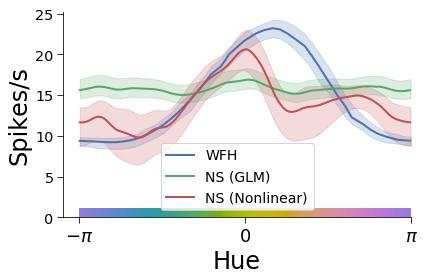

In [443]:
for neuron_id in [9]:
    plot_tuning_curves(bootstrapped, neuron=neuron_id, art_XGB=art_XGB, 
                   which_methods=['art', 'glm_lowreg','xgb'], 
                   legend = ['WFH',
                             'NS (GLM)',
                             'NS (Nonlinear)',
                            ],
                   smoothing=True, smoothing_frac = .1,
                   also_scatter = False,
                   savename = "final_figures/fig_2/tuning_curves_neuron_{}_legend.pdf".format(neuron_id)
                  )

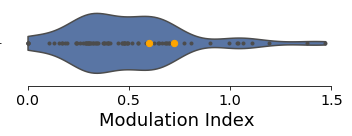

In [377]:
# these are the modulation indexes from WFH stimuli    
sig_diffs = pickle.load( open("neuron_color_modulation.p","r"))
sig_uncertainties = pickle.load( open("neuron_color_modulation_stds.p","r"))
sig_err = sig_uncertainties[:,1] - sig_diffs

plt.figure(figsize=(5,2))
ax = sns.violinplot(sig_diffs, cut=0, bw = .3, inner = "point", scale = 'count', orient = 'h',
              width = 1, color = sns.color_palette()[0])
plt.scatter(sig_diffs[[1,9]],[0,0], color = 'orange', s = 40)
    
sns.despine(offset=10, trim=True, ax =ax);
plt.xlabel('Modulation Index', fontsize = 18)
ax.set_xticklabels([0],minor = True,
                       fontsize = 24)
    

name = 'final_figures/fig_1_mystery/modulation_violin.pdf'
plt.tight_layout()
plt.savefig(name,format='pdf')

In [247]:
all_corrs_for_these_two = all_corrs.loc['xgb','art.']
mean = np.nanmean(all_corrs_for_these_two,axis=0)
low, high = CI_along_axis0_nan(all_corrs_for_these_two,5)
n = 7
print("Confidently worst 5 xgb: {} of {}".format(np.argsort(high)[:n], np.sort(high)[:n]))

all_corrs_for_these_two = all_corrs.loc['glm_lowreg','art.']
mean = np.nanmean(all_corrs_for_these_two,axis=0)
low, high = CI_along_axis0_nan(all_corrs_for_these_two,5)

print("Confidently worst 5 glm: {} of {}".format(np.argsort(high)[:n], np.sort(high)[:n]))


Confidently worst 5 xgb: [ 0 39 77 27 56  1 61] of [-0.54221839 -0.4439546  -0.25917622 -0.17533517 -0.13207045 -0.12404139
 -0.10950316]
Confidently worst 5 glm: [16  1 25 55 67  3 14] of [-0.55147281 -0.37103622 -0.24487639 -0.17842053 -0.16494288 -0.0522587
 -0.05129416]


### Look at the predictions from the WFH tuning curves

In [52]:
# on all images
nat_hist_art_model = prep_data_and_fit_neurons(df_neurons, nat_df, model='art_model_mean_corrected', session = 'nat', 
                          nat_features = sat_nat_features, image_feature = 'hue.histogram', name = 'lin_all',
                          verbose = 0, plot=False, which_neurons = 'all',joint=False,art_XGB=art_XGB)

art_model_pR2s_mean_corrected = [np.mean(nat_hist_art_model.iloc[i,0]['pseudo_R2']) for i in range(len(df_neurons))]



1it [00:00,  4.35it/s]../V4pyutils.py:902: RuntimeWarning: invalid value encountered in log
  L1 = np.sum(y * np.log(eps + yhat) - yhat)
../V4pyutils.py:903: RuntimeWarning: invalid value encountered in log
  L1_v = y * np.log(eps + yhat) - yhat
90it [00:31,  4.25it/s]


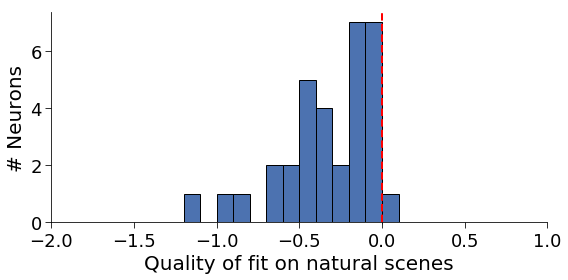

In [70]:
plt.figure(figsize=(8,4))
range_ = (-2,1)
plt.hist(art_model_pR2s_mean_corrected,bins=30, range = range_,edgecolor = 'k')
plt.xlim(range_)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.xlabel('Quality of fit on natural scenes', fontsize=20)
plt.ylabel('# Neurons', fontsize=20)
ax = plt.gca()
simpleaxis(ax)
ax.set_xticks([0],True)
plt.grid(axis = 'x', linestyle='--', linewidth=2, color = 'r', which='minor')

plt.tight_layout()
plt.savefig('final_figures/fig_1_mystery/artificial_TC_on_nat_images_pr2.pdf')

plt.show()

## Get the correlations between tuning curves

In [15]:
def get_all_corrs_resample(bootstrapped_fits):
    """
    Get the correlation between tuning curves for later extracting the mean and 95% CI
    correlation between every two TCs.    
    
    Create a matrix where each entry contains a list neurons, and each element is an array
    of shape (num_fits, n_neurons)
    """
    nbins = 8
    n_neurons = 90

    methods = list(bootstrapped_fits[0].columns) + ['VGG','art.']
    
    all_corrs = pd.DataFrame(index = methods, columns = methods, dtype=object)
    # initialize the corr_coef lists
    for i,method1 in enumerate(methods):
        for method2 in methods[i+1:]:
            all_corrs.loc[method1,method2] = np.zeros((len(bootstrapped_fits),n_neurons))
                
    hue = bootstrapped_fits[0].loc[0].iloc[0]['plain_hue']
    for neuron_id in tqdm(range(n_neurons)):
        
        #### Get the VGG TCs ##### 
        slopes, errs,_ = get_slopes(neuron_id, diff_df_all_real)
        
                
        #### Get the art. TCs #####
        
        x,y =  art_XGB.iloc[:,0][neuron_id]['hue'],\
                              art_XGB.iloc[:,0][neuron_id]['spike_counts']/\
                               art_XGB.iloc[:,0][neuron_id]['duration']
        x,y = bootstrap2(x,y)
        
        art_binned, _, _ = stats.binned_statistic(
                           x,y,
                              statistic='mean',bins = 8)
        
        for fit_num, single_fit in enumerate(bootstrapped_fits):
 
            # jitter around slopes
            noised_slopes = slopes+ np.array([np.random.normal(scale=(slopes[i]-errs[i,0])/2)
                                                      for i in range(len(slopes))])


            #### Get the TCs for the other methods too ####
            for i,method in enumerate(methods):
                # Get the first curve...
                if method=='art.':
                    binned_TC1 = art_binned
                elif method == 'VGG':
                    binned_TC1 = noised_slopes
                else:
                    predicted_response = single_fit.loc[neuron_id,method]['plain_predicted_spike_counts']
                    okay_predictions = (predicted_response<80) &(predicted_response>0)
                    predicted_response = predicted_response[okay_predictions]
                    this_hue = hue[okay_predictions]
                    
                    binned_TC1, _,_  = stats.binned_statistic(
                                                this_hue, predicted_response,
                                                statistic='mean',range = (-np.pi,np.pi),
                                                      bins = 8)  
                for method2 in methods[i+1:]:
                    # Get the second curve...
                    if method2=='art.':
                        binned_TC2 = art_binned
                    elif method2 == 'VGG':
                        binned_TC2 = noised_slopes
                    else:
                        predicted_response = single_fit.loc[neuron_id,method2]['plain_predicted_spike_counts']
                        okay_predictions = (predicted_response<80) &(predicted_response>0)
                        predicted_response = predicted_response[okay_predictions]
                        this_hue = hue[okay_predictions]
                        binned_TC2, _,_  = stats.binned_statistic(
                                                    this_hue, predicted_response,
                                                    statistic='mean',range = (-np.pi,np.pi),
                                                          bins = 8) 
                    # now correlate
                    this_corr_coef = np.corrcoef(binned_TC1, binned_TC2)[0,1]
#                     print(this_corr_coef,all_corrs.loc[method,method2])
                    # append to the proper list
                    all_corrs.loc[method,method2][fit_num,neuron_id]= this_corr_coef
    return all_corrs

In [95]:
# all_corrs = get_all_corrs_resample(bootstrapped)

100%|██████████| 90/90 [00:50<00:00,  1.91it/s]


In [38]:
# all_corrs.to_pickle("all_corrs.p")

In [16]:
all_corrs = pd.read_pickle("all_corrs.p")

Look at the correlation bounds for some curves

In [17]:
def plot_probability_mass(neuron_id, methods,all_corrs, legend = ['Nat. Images (LNP)',
                             'Nat. Images (Nonlinear)'], percentile =5, save = False):
    fig= plt.figure(figsize=(8,3))
    range_ = (-1,1)
    to_plot = pd.DataFrame(columns=["corrs","method"])
    percentile_values = []
    for i,method in enumerate(methods):
        this_to_plot = pd.DataFrame(columns=["corrs","method"])
        this_corr = all_corrs.loc[method,'art.'][:,neuron_id]
        percentile_values.append(np.percentile(this_corr,percentile))
        percentile_values.append(np.percentile(this_corr,100-percentile))
        this_to_plot["corrs"] = this_corr
        this_to_plot["method"] = legend[i]
        to_plot = pd.concat((to_plot,this_to_plot),axis=0)
    to_plot["null"]=""
    
    cc = sns.color_palette(n_colors = 4)[2:]

    ax = sns.violinplot(y="null",x="corrs",hue = "method", data=to_plot, inner='quartile', alpha =0.1,
                  split=True,orient='h', legend=False, palette=cc)
    
    ### figure magic to put a line at the a given percentile of the distribution
    for i,line in enumerate(ax.get_lines()[0:3:2]):
        #get a curve
        a = ax.get_children()[0].get_paths()[0].vertices
        index_of_percentile = np.argmin((a[:100,0]-percentile_values[i])**2)
        y_value = a[index_of_percentile,1]
        x,y  = line.get_data()
        line.set_xdata([percentile_values[i],percentile_values[i]])
        line.set_ydata([y_value,0])
        line.set_linestyle(':')

    for i,line in enumerate(ax.get_lines()[3:7:2]):
        #get a curve
        a = ax.get_children()[1].get_paths()[0].vertices
        index_of_percentile = np.argmin((a[100:,0]-percentile_values[i+2])**2)
        y_value = a[100+index_of_percentile,1]
        x,y  = line.get_data()
        line.set_xdata([percentile_values[i+2],percentile_values[i+2]])
        line.set_ydata([y_value,0])
        line.set_linestyle(':')


    handles, _ = ax.get_legend_handles_labels()
    ax.legend(fontsize = 17)
    
    plt.xlim(range_)
    plt.ylim((-.45,.45))
    ax.set_xticks([-1,-.5,0,.5,1])
    ax.set_xticklabels([-1,-.5,0,.5,1],fontsize= 22)
    plt.xlabel('Correlation', fontsize=30)
    plt.ylabel('Probability\nMass', fontsize=30)
    ax = plt.gca()
    simpleaxis(ax)
    plt.tight_layout()
    fig.patch.set_alpha(0)
    if save ==True:
        plt.savefig('final_figures/fig_2/probability_mass_of_TC_neuron_{}.pdf'.format(neuron_id),
                 facecolor=fig.get_facecolor())
    return ax



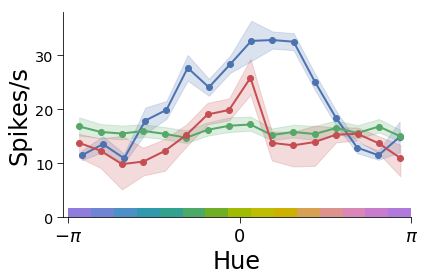

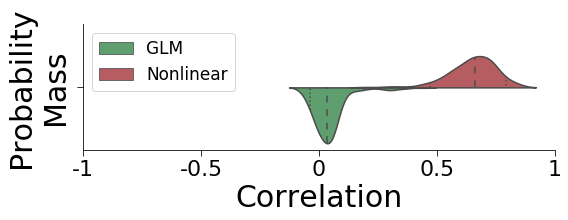

In [441]:
methods = ['glm_lowreg','xgb']
neuron_id = 9

plot_tuning_curves(bootstrapped, neuron=neuron_id, art_XGB=art_XGB, 
                   which_methods=['art','glm_lowreg','xgb'], 
                   smoothing=False, 
                  )
ax = plot_probability_mass(neuron_id, methods,all_corrs,save=True, legend = ["GLM",'Nonlinear']);




And now for all neurons

In [18]:
def plot_corr_scatter(all_corrs, method1, method2,color = None,save=False, percentile =5,
                         ybins = 16.,
                            xbins = 16.,
                            lower=-8):
    all_corrs_for_these_two = all_corrs.loc[method1,method2]
    mean = np.nanmean(all_corrs_for_these_two,axis=0)
    try:
        low, high = CI_along_axis0_nan(all_corrs_for_these_two,percentile)
    except ValueError:
        method2,method1 = method1, method2
        all_corrs_for_these_two = all_corrs.loc[method1,method2]
        mean = np.nanmean(all_corrs_for_these_two,axis=0)
        low, high = CI_along_axis0_nan(all_corrs_for_these_two,percentile)
#         stds=np.nanstd(vals,axis=0)[:,i]*1.96
    if ('glm' in method1) or ('glm' in method2):
        good_GLM_neurons = ~np.isnan(mean)
        mean = mean[good_GLM_neurons]
        low = low[good_GLM_neurons]
        high = high[good_GLM_neurons]



    print("Population mean of {} {}".format(np.nanmean(all_corrs_for_these_two),
                                            bootstrap_nan(np.nanmean(all_corrs_for_these_two,axis=0))))
    
    plt.figure(figsize=(7,5))
    if color == None:
        color = sns.color_palette(n_colors=3)[0]

    y_jitter = 0.2*np.random.randn(len(mean))
#     y = y_jitter + return_number_in_bin(mean, bins = ybins)
    y = np.argsort(mean)
    plt.errorbar(mean[y],range(len(y)), fmt= 'o',
        xerr = [mean[y]-low[y], high[y]-mean[y]],
       elinewidth = .8, capsize=2,capthick=1.5, color = color)

#     special neurons
    
    plt.errorbar(mean[[1,9]],[np.argwhere(y==1)[0,0],np.argwhere(y==9)[0,0]], fmt= 'o',
        xerr = [mean[[1,9]]-low[[1,9]], high[[1,9]]-mean[[1,9]]],
       elinewidth = .8, capsize=2,capthick=1.5, color='orange',zorder=3)

    ax = plt.gca()

    plt.xlim([-1,1])
    # the grid lines
    ax.set_xticks(np.arange(-1+2/xbins,1,2/xbins, ), minor=True)
    ax.set_xticks(np.arange(-1,1.1,4/xbins, ), minor=False)
    ax.axvline(ymin=lower, ymax = len(mean), c='k', zorder = 0, linewidth = 1.1)
    plt.grid(which = 'minor', linestyle=':')


    plt.xticks(fontsize= 13)
    plt.xlabel('Tuning curve correlation', fontsize=18)


    simpleaxis(ax)
    ax.spines['left'].set_visible(False)
    plt.yticks([])

    # the lower density plot
    ax = sns.kdeplot(mean,shade=True,ax=ax, color='w',bw=.07 ,zorder=0)
    
    
    plt.ylim(lower-1
             ,len(y))
    line = ax.get_lines()[-1]
    x, y = line.get_data()
    
    ax.fill_between(x, y1=lower+-lower*y, y2=lower, alpha=1, facecolor=color)
    
    plt.tight_layout()
    if save:
        plt.savefig("final_figures/fig_4/corr_scatter-{}-{}.pdf".format(method1,method2),format='pdf')
    plt.show()
    return ax

Population mean of 0.061780847063 [-0.01526706  0.13329414]


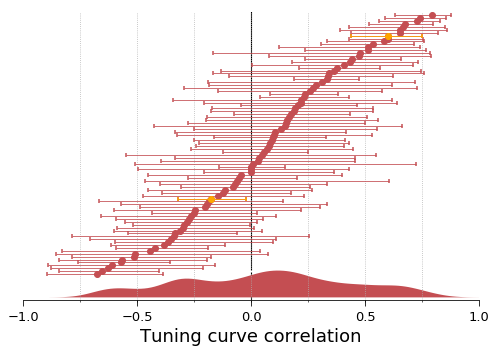

In [96]:
plot_corr_scatter(all_corrs,'xgb','art.',
                  color = sns.color_palette(n_colors=4)[3], 
                  save = False, percentile=5, xbins = 8.)

Let's compare the pR2s

In [19]:
def get_pr2s(method, bootstrapped_fits, SEM = False, plt_hist = False):
    """For all the neurons, return the means and the standard deviation of the pr2s"""
    means = []
    stds = []
    for neuron_id in range(90):
        this_pr2 = []
        for single_fit in bootstrapped:
            this_pr2 += single_fit[method][neuron_id]['pseudo_R2']
        # some values are essentially NaN but appear as huge. 
        this_pr2 = np.array(this_pr2)
        this_pr2 = this_pr2[this_pr2>-10]
        this_pr2 = this_pr2[this_pr2<1]
        if plt_hist:
            plt.hist(this_pr2)
            plt.show()

        means.append(np.nanmean(this_pr2))
        n = np.sqrt(len(this_pr2)) if SEM else 1
        stds.append(np.nanstd(this_pr2)/n)
    return means, stds

In [75]:
pr2_means_glm, pr2_stds_glm = get_pr2s('glm_lowreg',bootstrapped, SEM = False)
pr2_means_xgb, pr2_stds_xgb = get_pr2s('xgb',bootstrapped, plt_hist=False, SEM = False)

In [76]:
import mpl_toolkits.axes_grid.inset_locator as il


/opt/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


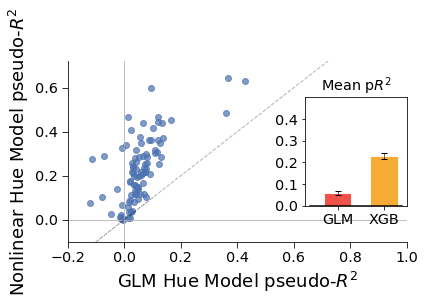

In [77]:
colors=['#EF3E34', '#F5A21E', '#134B64',  '#02A68E', '#FF07CD']*2
plt.scatter(pr2_means_glm, pr2_means_xgb, alpha = 0.7)
ax = plt.gca()
simpleaxis(ax)

plt.xlabel('GLM Hue Model pseudo-$R^2$',fontsize=18)
plt.ylabel('Nonlinear Hue Model pseudo-$R^2$',fontsize=18)
plt.axis([-0.2,1,-.1,.72])

ax.set_yticks([0], minor=True)
ax.set_xticks([0], minor=True)
plt.grid(which='minor')

lim = -0.1
alpha_lines = 0.3
plt.plot([-lim, lim], [-lim, lim], 'k:', lw=1, alpha=alpha_lines)
plt.plot([-1, 1], [-1, 1], 'k--', lw=1, alpha=alpha_lines)

# insert bar chart that is the average
means = [np.mean(pr2_means_glm), np.mean(pr2_means_xgb)]
mean_err = [np.std(pr2_means_glm)/np.sqrt(90), np.std(pr2_means_xgb)/np.sqrt(90)]

freq=0.1
ylim =[0,.5]

inset_axes = il.inset_axes(ax, 
                width="30%", # width = 34% of parent_bbox
                height="60%", 
                loc=7, borderpad = 0,
                axes_kwargs = {'title':'Mean p$R^2$',
                              'yticks':np.arange(ylim[0],ylim[1],freq),
                               'ylim':ylim })

labels =['GLM','XGB']
plt.bar(np.arange(np.size(means)), means, 0.6, align='center',
        ecolor='k', alpha=.9, color=colors, ec='w',yerr = mean_err,
        tick_label=labels, error_kw= {'elinewidth' : .6, 'capsize' : 3})
plt.plot([-.6,len(labels)-.6],[0,0],color='black',)
plt.tight_layout()
plt.savefig("final_figures/pr2_scatter_glm_xgb.pdf")

/opt/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


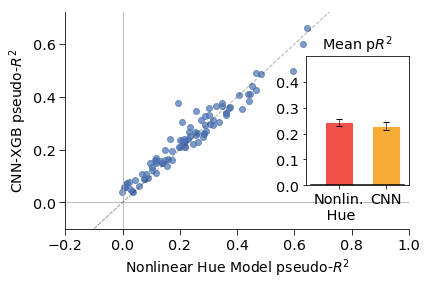

In [509]:
pr2_vgg = np.array(pickle.load(open( "VGG_M3_pr2.p", "rb" ) ))
colors=['#EF3E34', '#F5A21E', '#134B64',  '#02A68E', '#FF07CD']*2
plt.scatter(pr2_means_xgb, np.mean(pr2_vgg,axis=1), alpha = 0.7)
ax = plt.gca()
simpleaxis(ax)

plt.ylabel('CNN-XGB pseudo-$R^2$',fontsize=14)
plt.xlabel('Nonlinear Hue Model pseudo-$R^2$',fontsize=14)
plt.axis([-0.2,1,-.1,.72])

ax.set_yticks([0], minor=True)
ax.set_xticks([0], minor=True)
plt.grid(which='minor')

lim = -0.1
alpha_lines = 0.3
plt.plot([-lim, lim], [-lim, lim], 'k:', lw=1, alpha=alpha_lines)
plt.plot([-1, 1], [-1, 1], 'k--', lw=1, alpha=alpha_lines)

# insert bar chart that is the average
means = [np.mean(np.mean(pr2_vgg,axis=1)), np.mean(pr2_means_xgb)]
mean_err = [np.std(np.mean(pr2_vgg,axis=1))/np.sqrt(90), np.std(pr2_means_xgb)/np.sqrt(90)]

freq=0.1
ylim =[0,.5]

inset_axes = il.inset_axes(ax, 
                width="30%", # width = 34% of parent_bbox
                height="60%", 
                loc=7, borderpad = 0,
                axes_kwargs = {'title':'Mean p$R^2$',
                              'yticks':np.arange(ylim[0],ylim[1],freq),
                               'ylim':ylim })

labels =['Nonlin.\n Hue','CNN']
plt.bar(np.arange(np.size(means)), means, 0.6, align='center',
        ecolor='k', alpha=.9, color=colors, ec='w',yerr = mean_err,
        tick_label=labels, error_kw= {'elinewidth' : .6, 'capsize' : 3})
plt.plot([-.6,len(labels)-.6],[0,0],color='black',)
plt.tight_layout()
plt.savefig("final_figures/pr2_scatter_vgg_xgb.pdf")

For other methods too, and comparisons between methods

('lin_all', 'glm_lowreg')
Population mean of 0.32233665916 [ 0.27182389  0.36045103]


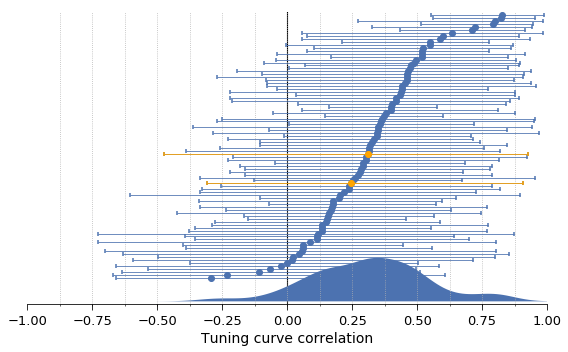

('lin_all', 'xgb')
Population mean of 0.394377557199 [ 0.33985147  0.4458573 ]


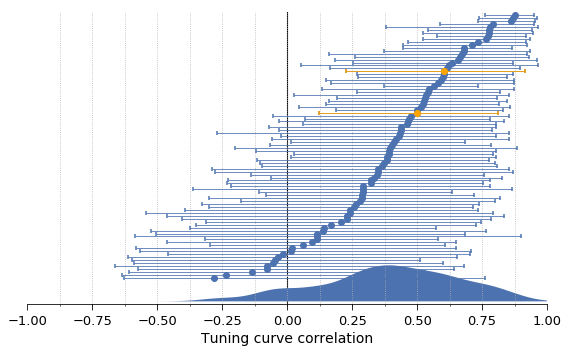

('lin_all', 'VGG')
Population mean of 0.275330122074 [ 0.18181639  0.34593249]


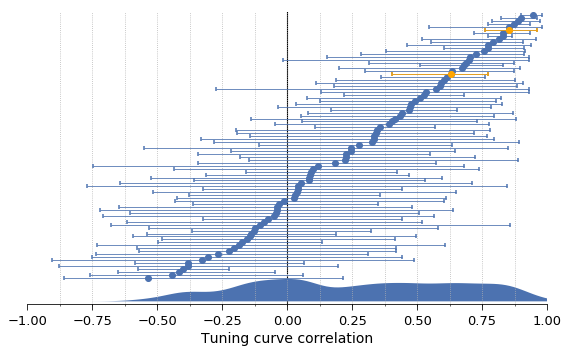

('lin_all', 'art.')
Population mean of 0.0530859662624 [-0.02060581  0.11470357]


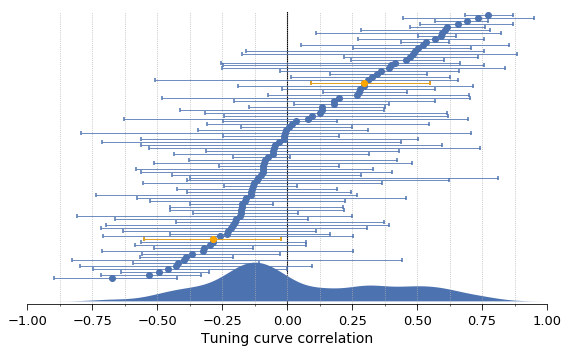

('glm_lowreg', 'xgb')
Population mean of 0.291534660663 [ 0.2389519   0.34972243]


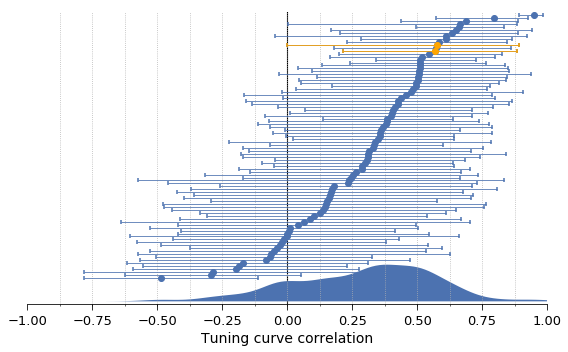

('glm_lowreg', 'VGG')
Population mean of 0.112340063201 [ 0.04516349  0.17477129]


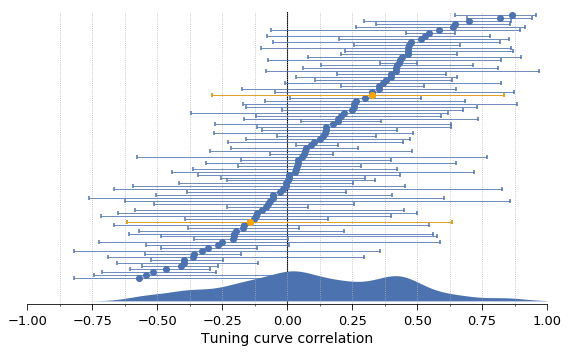

('glm_lowreg', 'art.')
Population mean of 0.00782859548249 [-0.05179194  0.06787141]


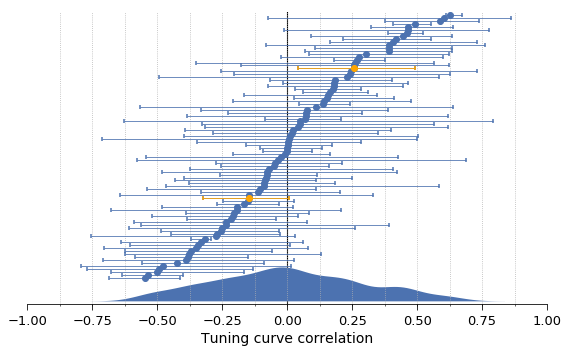

('xgb', 'VGG')
Population mean of 0.219764486355 [ 0.15084089  0.29469696]


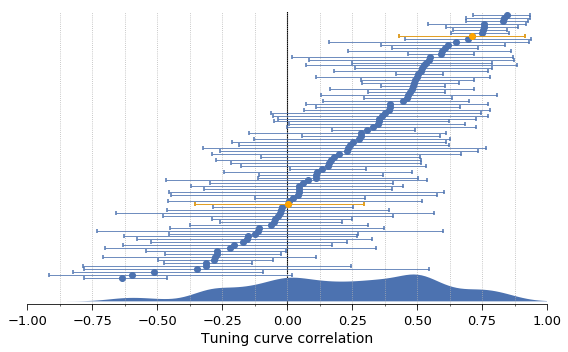

('xgb', 'art.')
Population mean of 0.0440074112581 [-0.02826325  0.11660252]


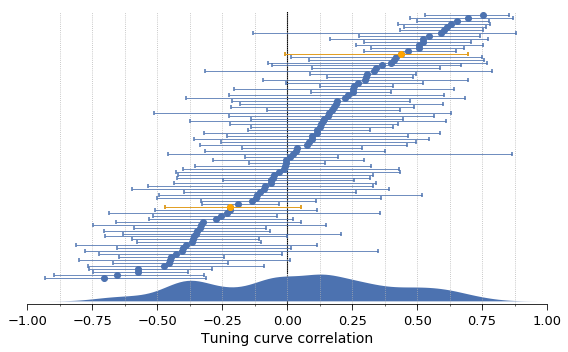

('VGG', 'art.')
Population mean of 0.112944451497 [ 0.02749103  0.19197347]


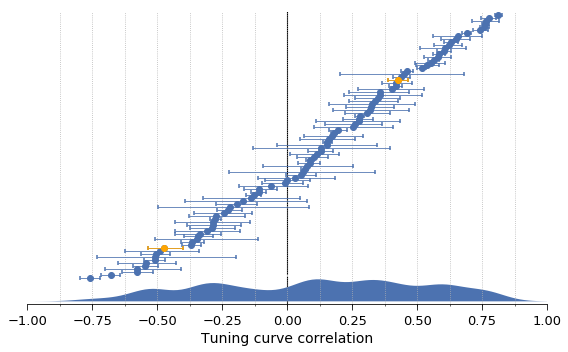

In [272]:
methods = all_corrs.columns
for i,method1 in enumerate(methods):
    for method2 in methods[i+1:]:
        print(method1,method2)

        plot_corr_scatter(all_corrs,method1,method2, save=False)

What happens when we randomly correlate?

(-1, 1)

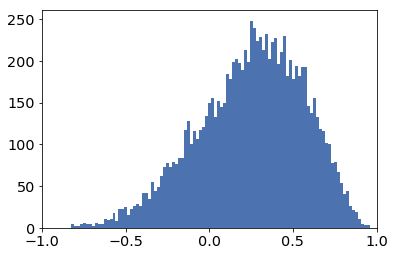

In [497]:
x = np.arange(0,1.,.1)
y =np.sin(x)

corrs = []
for i in range(10000):
    y_noised = np.random.randn(10)*1\
    +y
    
    corrs.append(np.corrcoef(y,y_noised)[0,1])
plt.hist(corrs, bins=100)
plt.xlim(-1,1)

So if we noisily reconstruct the tuning curve, and we almost certainly do, then it will appear as if tuning changes. However, I have estimated the noise on the fit and the data by refitting, sampling with replacement. If it really were the case that tuning were the same but the fits are noisy, then we would see distributions that look like this. We definitely don't. 

Nevertheless, this does show that the distribution of correlations does not correpond to the probability that the underlying tuning is the same. 

Now we calculate the null distribution and replot

In [39]:
def get_all_null_dists(bootstrapped_fits, n_fits=1):
    """
    Correlates the tuning curves of one neuron with those of a different neuron built
    by a different method
    """
    nbins = 8
    n_neurons = 90

    methods = list(bootstrapped_fits[0].columns)
    
    all_corrs = pd.DataFrame(index = methods, columns = methods, dtype=object)
    # initialize the corr_coef lists
    for i,method1 in enumerate(methods):
        for method2 in methods[i:]:
            all_corrs.loc[method1,method2] = []
                
    hue = bootstrapped_fits[0].loc[0].iloc[0]['plain_hue']
    
    for single_fit in tqdm(bootstrapped_fits[:n_fits]):
    
        for i,method in enumerate(methods):

            for method2 in methods[i:]:

                for neuron_id in range(n_neurons):
                    for neuron2_id in range(neuron_id+1,n_neurons):

                        # Get the first curve...
                        if method=='art.':
                            x,y =  art_XGB.iloc[:,0][neuron_id]['hue'],                                                  art_XGB.iloc[:,0][neuron_id]['spike_counts']/                                                   art_XGB.iloc[:,0][neuron_id]['duration']
                            x,y = bootstrap2(x,y)

                            binned_TC1, _, _ = stats.binned_statistic(
                                           x,y,
                                              statistic='mean',bins = 8)
                        elif method == 'VGG':
                            slopes, errs,_ = get_slopes(neuron_id, diff_df_all_real)
                             # jitter around slopes
                            noised_slopes = slopes+ np.array([np.random.normal(scale=(slopes[i]-errs[i,0])/2)
                                                              for i in range(len(slopes))])
                            binned_TC1 = noised_slopes
                        else:
                            predicted_response = single_fit.loc[neuron_id,method]['plain_predicted_spike_counts']
                            binned_TC1, _,_  = stats.binned_statistic(
                                                        hue, predicted_response,
                                                        statistic='mean',range = (-np.pi,np.pi),
                                                              bins = 8)  
                        # Get the second curve...
                        if method2=='art.':
                            x,y =  art_XGB.iloc[:,0][neuron2_id]['hue'],                                                      art_XGB.iloc[:,0][neuron2_id]['spike_counts']/                                                       art_XGB.iloc[:,0][neuron2_id]['duration']
                            x,y = bootstrap2(x,y)

                            binned_TC2, _, _ = stats.binned_statistic(
                                           x,y,
                                              statistic='mean',bins = 8)
                        elif method2 == 'VGG':
                            slopes, errs,_ = get_slopes(neuron2_id, diff_df_all_real)
                             # jitter around slopes
                            noised_slopes = slopes+ np.array([np.random.normal(scale=(slopes[i]-errs[i,0])/2)
                                                              for i in range(len(slopes))])
                            binned_TC2 = noised_slopes
                        else:
                            predicted_response = single_fit.loc[neuron2_id,method2]['plain_predicted_spike_counts']
                            binned_TC2, _,_  = stats.binned_statistic(
                                                        hue, predicted_response,
                                                        statistic='mean',range = (-np.pi,np.pi),
                                                              bins = 8)  
                        # now correlate
                        this_corr_coef = np.corrcoef(binned_TC1, binned_TC2)[0,1]
                        # append to the proper list
                        all_corrs.loc[method,method2].append(this_corr_coef)            

    return all_corrs

In [40]:
def get_WFH_null_dists(art_XGB, n_iters=1):
    """
    Correlates the tuning curves of one neuron with those of a different neuron built
    by a different method
    """
    nbins = 8
    n_neurons = 90
    

    all_corrs_ = []
    for n in range(n_iters):
        for neuron_id in range(n_neurons):
            for neuron2_id in range(neuron_id+1,n_neurons):


                x,y =  art_XGB.iloc[:,0][neuron_id]['hue'],\
                                      art_XGB.iloc[:,0][neuron_id]['spike_counts']\
                                       /art_XGB.iloc[:,0][neuron_id]['duration']
                x,y = bootstrap2(x,y)

                binned_TC1, _, _ = stats.binned_statistic(
                               x,y,
                              statistic='mean',bins = 8)
    #           
                x,y =  art_XGB.iloc[:,0][neuron2_id]['hue'],\
                                      art_XGB.iloc[:,0][neuron2_id]['spike_counts']\
                                       /art_XGB.iloc[:,0][neuron2_id]['duration']
                x,y = bootstrap2(x,y)

                binned_TC2, _, _ = stats.binned_statistic(
                               x,y,
                                  statistic='mean',bins = 8)
    #                        
                # now correlate
                this_corr_coef = np.corrcoef(binned_TC1, binned_TC2)[0,1]
                # append to the proper list
                all_corrs_.append(this_corr_coef)            
            
    return all_corrs_

In [41]:
all_null_dists = get_all_null_dists(bootstrapped, 1)


100%|██████████| 1/1 [00:10<00:00, 10.11s/it]


In [39]:

def plot_corr_scatter_with_null(all_corrs, method1, method2,color = None,save=False, percentile =5,
                         ybins = 16.,simcolor = None,simcolor2 = None, null=True,
                            xbins = 16., simulated = None,simulated2 = None,
                            lower=-8, mean_WFH_corrs  = None):
    all_corrs_for_these_two = all_corrs.loc[method1,method2]
    mean = np.nanmean(all_corrs_for_these_two,axis=0)
    try:
        low, high = CI_along_axis0_nan(all_corrs_for_these_two,percentile)
    except ValueError:
        method2,method1 = method1, method2
        all_corrs_for_these_two = all_corrs.loc[method1,method2]
        mean = np.nanmean(all_corrs_for_these_two,axis=0)
        low, high = CI_along_axis0_nan(all_corrs_for_these_two,percentile)
#         stds=np.nanstd(vals,axis=0)[:,i]*1.96
    if ('glm' in method1) or ('glm' in method2):
        good_GLM_neurons = ~np.isnan(mean)
        mean = mean[good_GLM_neurons]
        low = low[good_GLM_neurons]
        high = high[good_GLM_neurons]

    if mean_WFH_corrs is not None:
        tuned_neurons = mean_WFH_corrs > 0
        mean = mean[tuned_neurons]
        low = low[tuned_neurons]
        high = high[tuned_neurons]
        all_corrs_for_these_two =  all_corrs_for_these_two[tuned_neurons]

    print("Population mean of {} {}".format(np.nanmean(all_corrs_for_these_two),
                                            bootstrap_nan(np.nanmean(all_corrs_for_these_two,axis=0))))
    if method1=='VGG':
        plt.figure(figsize=(9,5))
        directory = 'fig_4'
    else:
        plt.figure(figsize=(9,5))
        directory = 'fig_2'
    if color == None:
        color = sns.color_palette(n_colors=3)[0]

    y_jitter = 0.2*np.random.randn(len(mean))
#     y = y_jitter + return_number_in_bin(mean, bins = ybins)
    y = np.argsort(mean)
    plt.errorbar(mean[y],range(len(y)), fmt= 'o',
        xerr = [mean[y]-low[y], high[y]-mean[y]],
       elinewidth = .8, capsize=2,capthick=1.5, color = color)

#     special neurons
    
    plt.errorbar(mean[[1,9]],[np.argwhere(y==1)[0,0],np.argwhere(y==9)[0,0]], fmt= 'o',
        xerr = [mean[[1,9]]-low[[1,9]], high[[1,9]]-mean[[1,9]]],
       elinewidth = .8, capsize=2,capthick=1.5, color='orange',zorder=3)

    ax = plt.gca()

    plt.xlim([-1,1])
    # the grid lines
    ax.set_xticks(np.arange(-1+2/xbins,1,2/xbins, ), minor=True)
    ax.set_xticks(np.arange(-1,1.1,4/xbins, ), minor=False)
    ax.axvline(ymin=lower, ymax = len(mean), c='k', zorder = 0, linewidth = 1.1)
    plt.grid(which = 'minor', linestyle=':')


    plt.xticks(fontsize= 13)
    plt.xlabel('Tuning curve correlation', fontsize=18)


    simpleaxis(ax)
    ax.spines['left'].set_visible(False)
    

    
    plt.yticks([])
    
    # the Null
    if null==True:
        sns.kdeplot(all_null_dists.iloc[2,2],shade=True,ax=ax, color='w',bw=.07 ,zorder=0)

        line = ax.get_lines()[-1]
        x, y = line.get_data()

        ax.plot(x, lower+-lower*y,lw=2.5,c='w' )
        ax.plot(x, lower+-lower*y,lw=2, )
    
    # the simulated
    if not (simulated is None):        
        sns.kdeplot(simulated,shade=True,ax=ax, 
                    color='w',
                    bw=.07 ,zorder=0)

        line = ax.get_lines()[-1]
        x, y = line.get_data()

        if simcolor is None:
            cc = sns.color_palette(n_colors=4)[1]
        else:
            cc = simcolor
        ax.plot(x, lower+-lower*y,'--',lw=3,c=cc,zorder=2)
        
        # the simulated
    if not (simulated2 is None):        
        sns.kdeplot(simulated2,shade=True,ax=ax, 
                    color='w',
                    bw=.07 ,zorder=0)

        line = ax.get_lines()[-1]
        x, y = line.get_data()

        if simcolor2 is None:
            cc = sns.color_palette(n_colors=4)[1]
        else:
            cc = simcolor2
        ax.plot(x, lower+-lower*y,'--',lw=3,c=cc,zorder=2)
    

    # the lower density plot
    sns.kdeplot(mean,shade=True,ax=ax, color='w',bw=.07 ,zorder=0)
    

    line = ax.get_lines()[-1]
    x, y = line.get_data()
    
    ax.fill_between(x, y1=lower+-lower*y, y2=lower, alpha=1, facecolor=color, zorder =2,)
            
    plt.ylim(lower
             ,90)
    
    plt.tight_layout()
    if save:
        plt.savefig("final_figures/{}/corr_scatter-{}-{}.pdf".format(directory,method1,method2),format='pdf')
    plt.show()
    return ax

In [37]:
sim_corrs = pickle.load( open("sim_corrs.p",'rb'))

Population mean of 0.14566378421 [ 0.05840308  0.22609705]


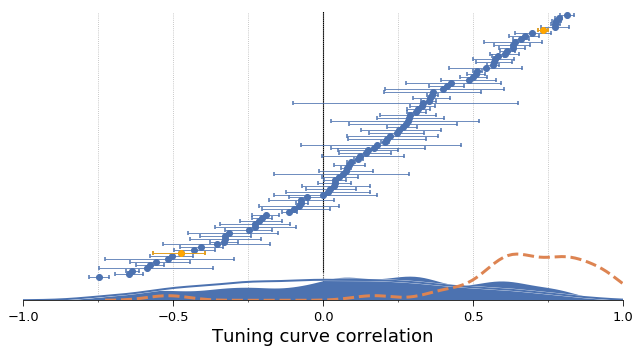

In [267]:
plot_corr_scatter_with_null(all_corrs,'VGG','art.',
                  color = sns.color_palette(n_colors=4)[0],simulated= sim_corrs,
                  save = False, percentile=5, xbins = 8.)

### Make some final scatter plots

In [20]:

VGG_pr2s = pickle.load(open( "XGB_all_neurons_pr2.p", "rb" ) )
VGG_pr2 = np.mean(VGG_pr2s, axis=1)
VGG_pr2_std = np.std(VGG_pr2s, axis=1)

In [21]:
mean_VGG_bootstrapped_corrs = np.nanmean(all_corrs.loc['VGG','art.'],axis=0)
VGG_corrs_low, VGG_corrs_high = CI_along_axis0(all_corrs.loc['VGG','art.'])

p of 0.610988784008


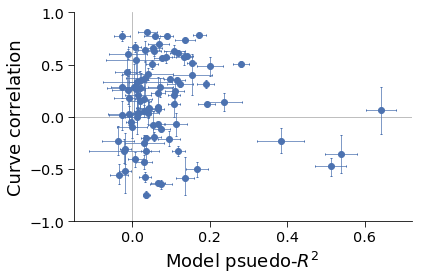

In [208]:
plt.errorbar(VGG_pr2, mean_VGG_bootstrapped_corrs, xerr=VGG_pr2_std, 
             yerr = [mean_VGG_bootstrapped_corrs-VGG_corrs_low, 
                     VGG_corrs_high-mean_VGG_bootstrapped_corrs],
             linestyle="None",  fmt = "o", elinewidth = .7, capsize =1)
plt.ylim([-1,1])
ax = plt.gca()
ax.set_yticks([0], minor=True)
ax.set_xticks([0], minor=True)

plt.grid(which = 'minor')

plt.xlabel('Model psuedo-$R^2$', fontsize = 18)
plt.ylabel('Curve correlation',  fontsize = 18)
# plt.ylim([-1,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(VGG_pr2,mean_VGG_bootstrapped_corrs)
print("p of {}".format(p_value))
simpleaxis(ax)
plt.tight_layout()
plt.savefig('final_figures/fig_4/VGG_pr2_vs_corr.pdf', format='pdf')
plt.show()

## Matt's control: look at the distribution of correlations between WFH curves fit on non-overlapping subsets of trials, as well as the same for NS curves

First display the individual tuning curves from different bootstrapped fits

In [20]:
def get_a_few_tuning_curves(bootstrapped_fits, indices, which_neurons = 'all', verbose = 0):
    """From a list of dataframes, each one being the outout of `fit_all_methods_resample`, we 
    build the tuning curve from a few of them and then return them.
    
    Indices: which bootstrapped # fit, list of ints
    
    Returns a dictionary, with keys being methods, and values being a list containing the TCs selected by indices
    """
    
    hue = bootstrapped_fits[0].loc[0].iloc[0]['plain_hue']
    
    all_curves = dict()
    
    if which_neurons == 'all':
        which_neurons = range(90)
        
    try: len(which_neurons)
    except TypeError:
        which_neurons = [which_neurons]
    
    for method in bootstrapped_fits[0].columns:
        all_curves[method]=list()
        if verbose>0:print(method)
        
        for neuron_id in which_neurons:
            for fit_num in indices:
                single_fit = bootstrapped[fit_num]
                predicted_response = single_fit.loc[neuron_id,method]['plain_predicted_spike_counts']
                all_curves[method].append(predicted_response)
                                
    return all_curves

In [21]:
def plot_subsampled_tuning_curves(bootstrapped_fits, neuron, art_XGB, which_methods = 'all',smoothing = True,
                      n_bins = 16, savename = None, smoothing_frac = 1/16., legend = None,
                       num_curves = 2, also_scatter = False):
    indices = np.random.choice( len(bootstrapped_fits), size = num_curves ,replace = False)
    
    all_curves = get_a_few_tuning_curves(bootstrapped_fits, indices, neuron)
    cc = [sns.color_palette(n_colors = 50)[0]] +sns.color_palette(n_colors = 50)[2:]
    linestyles = ['-', '--', '-.', ':']+['--']*15
    
    lw = 1

    if which_methods=='all':
        which_methods = all_curves.keys()
        
    handles = []
    for i,method in enumerate(which_methods):
        
        
        if method == 'art':
            for nc in range(num_curves):
                subsampled_hue, subsampled_response = bootstrap2(art_XGB.iloc[:,0][neuron]['hue'], 
                            art_XGB.iloc[:,0][neuron]['spike_counts']/art_XGB.iloc[:,0][neuron]['duration'])
                
                l = method if nc==0 else None
                
                if smoothing==True:
                    hue,tuning_curve,_ = lowess_smooth(subsampled_hue, 
                                                                    subsampled_response,)
                    n_every = len(tuning_curve)//40


                    handle, = plt.plot(hue[::n_every],tuning_curve[::n_every], lw=lw, c = cc[i], 
                             linestyle = linestyles[nc], label = l)
                else:
                    bin_means, bin_edges, binnumber = stats.binned_statistic(subsampled_hue,
                                              subsampled_response,
                                              bins = n)
                    hues = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
                    handle, = plt.plot(hues,bin_means, '-o', lw=lw, c = cc[i], 
                                      linestyle = linestyles[nc], label = l)
                if nc==0: handles.append(handle)
        else:
            for nc in range(num_curves):
                tuning_curve = all_curves[method][nc]
                hue = np.linspace(-np.pi,np.pi,len(tuning_curve))

                okay_predictions = (tuning_curve<80) &(tuning_curve>0)
                tuning_curve = tuning_curve[okay_predictions]
                hue = hue[okay_predictions]
                
                l = method if nc==0 else None

                if smoothing:
                    frac = smoothing_frac
                    if also_scatter:
                        plt.scatter(hue,tuning_curve, color = cc[i], alpha = 0.5)

                    hue,tuning_curve,_ = lowess_smooth(hue,tuning_curve, lowess_frac=frac)

                    handle, = plt.plot(hue,tuning_curve, lw=lw, c = cc[i],linestyle = linestyles[nc],  label = l)

                else:
                    #we're binning
                    if also_scatter:
                        plt.scatter(hue,tuning_curve, color = cc[i], alpha = 0.5)

                    tuning_curve, bin_edges, binnumber = stats.binned_statistic(hue,tuning_curve, 
                                                                                statistic='mean',
                                                                                      bins = n_bins)
                   

                    hue = bin_edges[:-1]+0.5*(bin_edges[1]-bin_edges[0])
                    handle, = plt.plot(hue,tuning_curve, '-o', lw=lw, c = cc[i], linestyle = linestyles[nc], label = l)
                if nc==0: handles.append(handle)
    
    ax  = plt.gca()
#     plt.axis([-np.pi,np.pi,0,30])
    colorline(np.linspace(-np.pi,np.pi,len(hue)),
              np.zeros(len(hue)), linewidth=6)

    ax.set_xticks([-np.pi,0,np.pi], minor=False)
    ax.set_yticks([0,5,10,15], minor=False)
    ax.set_xticklabels(['$-\pi$','0','$\pi$'])
    plt.ylabel('Spikes/s', fontsize = 18)
    plt.xlabel('Hue', fontsize = 18)
    if legend is not None:
        plt.legend(handles,legend,fontsize='medium')
    plt.tight_layout()
    if savename is not None:
        plt.savefig(savename+str(neuron)+".pdf",format='pdf')
    plt.show()

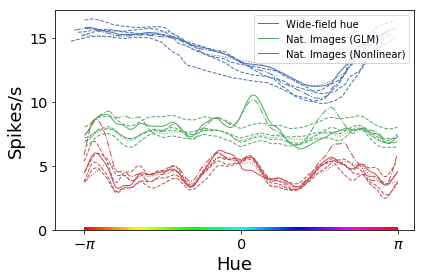

In [22]:
plot_subsampled_tuning_curves(bootstrapped, 17, art_XGB, which_methods = ['art','glm_lowreg','xgb'],smoothing = True,
                      n_bins = 16, smoothing_frac = 1/16., 
                              legend  = ['Wide-field hue',
                             'Nat. Images (GLM)',
                             'Nat. Images (Nonlinear)',
                            ],
                       num_curves = 7, savename = "final_figures/tuning_curves_lines_neuron")

Now build routines for splitting the trials into random 2-fold CV, and return both tuning curves

In [24]:
## first for the WFH
def get_TCs_on_two_halves(art_XGB, neuron_id,n=16):
    """Splits the trials in half, randomly, and returns the binned tuning curves for each half."""
    
    n_trials = len(art_XGB.iloc[:,0][neuron_id]['hue'])
    mask = np.random.choice([True,False],size=n_trials)
    
    
    # the first curve
    bin_means1, bin_edges1, binnumber1 = stats.binned_statistic(art_XGB.iloc[:,0][neuron_id]['hue'][mask],
                          art_XGB.iloc[:,0][neuron_id]['spike_counts'][mask]/\
                           art_XGB.iloc[:,0][neuron_id]['duration'][mask], statistic='mean',
                          bins = n)
  
    hues1 = bin_edges1[1:] - (bin_edges1[1] - bin_edges1[0])/2
    
    # the second curve
    bin_means2, bin_edges2, binnumber2 = stats.binned_statistic(art_XGB.iloc[:,0][neuron_id]['hue'][~mask],
                          art_XGB.iloc[:,0][neuron_id]['spike_counts'][~mask]/\
                           art_XGB.iloc[:,0][neuron_id]['duration'][~mask], statistic='mean',
                          bins = n)
  
    hues2 = bin_edges2[1:] - (bin_edges2[1] - bin_edges2[0])/2

    return (hues1, bin_means1), (hues2, bin_means2)


Plot these, too...

In [25]:
def plot_two_WFH_tuning_curves(art_XGB, neuron_id, nbins = 16):
    linestyles = ['-', '--', '-.', ':']
    cc = [sns.color_palette(n_colors = 50)[0]] +sns.color_palette(n_colors = 50)[2:]

    lw = 1.5

    (hues1, bin_means1), (hues2, bin_means2) = get_TCs_on_two_halves(art_XGB, neuron_id,n=nbins)
    
    print("Corr of {}".format(np.corrcoef(bin_means1, bin_means2)[0,1]))
    
    handle, = plt.plot(hues1,bin_means1, '-o', lw=lw, c = cc[0], 
                                      linestyle = linestyles[0])
    
    handle, = plt.plot(hues2,bin_means2, '-o', lw=lw, c = cc[0], 
                                      linestyle = linestyles[1])
    
    ax  = plt.gca()
#     plt.axis([-np.pi,np.pi,0,30])
    colorline(np.linspace(-np.pi,np.pi,len(hues1)),
              np.zeros(len(hues1)), linewidth=6)

    ax.set_xticks([-np.pi,0,np.pi], minor=False)
    ax.set_yticks([0,5,10,15], minor=False)
    ax.set_xticklabels(['$-\pi$','0','$\pi$'])
    plt.ylabel('Spikes/s', fontsize = 18)
    plt.xlabel('Hue', fontsize = 18)
   
    plt.tight_layout()
    plt.show()

Corr of 0.90021678576


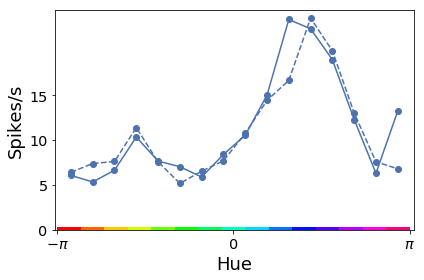

In [11]:
## These curves are fit on nonoverlapping halves of trials
plot_two_WFH_tuning_curves(art_XGB,18)

And get the correlations between them

And do this hundreds of times

In [26]:
def get_CI_for_WFH_halves_correlations(art_XGB, num_recorrs = 100):
    mean_corrs = []
    lows = []
    highs = []
    for neuron_id in range(90):
        corr_list = []
        for i in range(num_recorrs):
            # these are the two curves
            (hues1, bin_means1), (hues2, bin_means2) = get_TCs_on_two_halves(art_XGB, neuron_id,n=nbins)
            # now correlate
            this_corr_coef = np.corrcoef(bin_means1, bin_means2)[0,1]
            corr_list.append(this_corr_coef)

        # now get the CI
        low,high = CI_along_axis0(corr_list)
        mean_corrs.append(np.mean(corr_list))
        lows.append(low)
        highs.append(high)
    
    return np.array(mean_corrs), np.array(lows), np.array(highs)

In [43]:
mean_corrs, lows, highs = get_CI_for_WFH_halves_correlations(art_XGB)

In [27]:
def plot_corr_scatter_control(mean_corrs, lows, highs, savename=False, color=None,percentile =5,ybins = 16.,
    xbins = 8.,    lower=-8, label="WFH"):

    print("Population mean of {} {}".format(np.nanmean(mean_corrs),
                                            CI_along_axis0(mean_corrs)))
     
    if color == None:
        color = sns.color_palette(n_colors=3)[0]
    plt.figure(figsize=(7,4))
   
    y = np.argsort(mean_corrs)
    print("Worst 5 neurons: ",y[:5])
    
    plt.errorbar(mean_corrs[y],range(len(y)), fmt= 'o',
        xerr = [mean_corrs[y]-lows[y], highs[y]-mean_corrs[y]],
       elinewidth = .8, capsize=2,capthick=1.5, color=color)

# #     special neurons
#     plt.errorbar(mean[17:19],[np.argwhere(y==17)[0,0],np.argwhere(y==18)[0,0]], fmt= 'o',
#         xerr = [mean[17:19]-low[17:19], high[17:19]-mean[17:19]],
#        elinewidth = .8, capsize=2,capthick=1.5, color='orange',zorder=3)

    ax = plt.gca()
    plt.xlim([-1,1])
   
    
    
    # the grid lines
    ax.set_xticks(np.arange(-1+2/xbins,1,2/xbins, ), minor=True)
    ax.axvline(ymin=lower, ymax = len(mean_corrs), c='k', zorder = 0, linewidth = 1.1)
    plt.grid(which = 'minor', linestyle=':')


    plt.xticks(fontsize= 18)
    ax.set_xticks([-1,-.5,0,.5,1], minor=False)

    plt.xlabel('Split-trials correlation',fontsize=20)


    simpleaxis(ax)
    ax.spines['left'].set_visible(False)
    plt.yticks([])

    # the lower density plot
    ax = sns.kdeplot(mean_corrs,shade=True,ax=ax, color='w',bw=.07 ,zorder=0,)
    
    
    plt.ylim(lower-1
             ,len(y))
    line = ax.get_lines()[-1]
    x, y = line.get_data()
    
    ax.fill_between(x, y1=lower+-lower*y, y2=lower, alpha=1, color = color)
    
    plt.tight_layout()
    if savename:
        plt.savefig("final_figures/supp_fig_halves_control/{}.pdf".format(savename),format='pdf')
    plt.show()
    return ax

Population mean of 0.711525765965 (0.1902278355720059, 0.9733969566996179)
('Worst 5 neurons: ', array([86, 85,  0, 40, 41]))


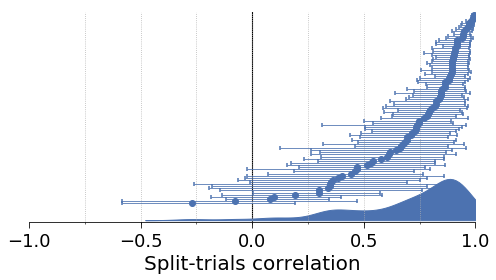

In [33]:
plot_corr_scatter_control(mean_corrs, lows, highs, )#savename='WFH_halves_control')

Corr of 0.276728880117


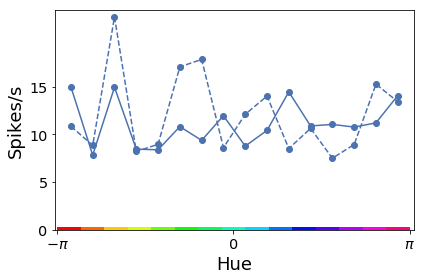

In [189]:
# what's happening with those low corrs?
plot_two_WFH_tuning_curves(art_XGB,85)

### Now for NS

In [28]:
def fit_all_methods_on_halves(resample = True):
    nat_hist_glm_lowreg = prep_data_and_fit_neurons(df_neurons, nat_df, model='GLM_poisson', session = 'nat', 
              nat_features = sat_nat_features, image_feature = 'hue.histogram', name = 'glm_lowreg', lambd='min',
              verbose = 0, plot=False, which_neurons = 'all',joint=True, cross_validate = False,
                                                    resample = resample, fit_on_halves = True,)  
    nat_hist_XGB = prep_data_and_fit_neurons(df_neurons, nat_df, model='XGB_poisson', session = 'nat', 
                  nat_features = sat_nat_features, image_feature = 'hue.histogram', name = 'xgb', resample = resample,
                  verbose = 0, plot=False, which_neurons = 'all',joint=True, 
                                             cross_validate = False,fit_on_halves = True)
    

    
    all_methods = nat_hist_glm_lowreg.join(nat_hist_XGB)
    
    return all_methods

In [ ]:
fit_halves = [fit_all_methods_on_halves()]
# then resample
n=100

for i in range(n):
    print(i)
    a = fit_all_methods_on_halves()
    fit_halves.append(a)


90it [01:39,  1.32it/s]
90it [01:04,  2.03it/s]
0it [00:00, ?it/s]

0


90it [01:39,  1.37it/s]
90it [01:03,  2.16it/s]
0it [00:00, ?it/s]

1


90it [01:39,  1.33it/s]
90it [01:03,  2.03it/s]
0it [00:00, ?it/s]

2


90it [01:39,  1.29it/s]
90it [01:05,  2.00it/s]
0it [00:00, ?it/s]

3


90it [01:37,  1.33it/s]
90it [01:03,  2.11it/s]
0it [00:00, ?it/s]

4


90it [01:37,  1.31it/s]
90it [01:05,  1.99it/s]
0it [00:00, ?it/s]

5


90it [01:38,  1.33it/s]
90it [01:04,  2.10it/s]
0it [00:00, ?it/s]

6


90it [01:36,  1.34it/s]
90it [01:04,  2.04it/s]
0it [00:00, ?it/s]

7


90it [01:39,  1.31it/s]
90it [01:04,  2.04it/s]
0it [00:00, ?it/s]

8


90it [01:37,  1.33it/s]
90it [01:05,  2.21it/s]
0it [00:00, ?it/s]

9


90it [01:38,  1.30it/s]
90it [01:03,  2.08it/s]
0it [00:00, ?it/s]

10


90it [01:36,  1.31it/s]
90it [01:04,  2.48it/s]
0it [00:00, ?it/s]

11


90it [01:39,  1.33it/s]
90it [01:03,  2.08it/s]
0it [00:00, ?it/s]

12


90it [01:38,  1.35it/s]
90it [01:03,  2.18it/s]
0it [00:00, ?it/s]

13


90it [01:37,  1.37it/s]
90it [01:04,  2.12it/s]
0it [00:00, ?it/s]

14


90it [01:37,  1.31it/s]
90it [01:02,  2.02it/s]
0it [00:00, ?it/s]

15


90it [01:37,  1.35it/s]
90it [01:03,  2.17it/s]
0it [00:00, ?it/s]

16


63it [01:12,  1.15s/it]

In [85]:
len(fit_halves)

101

In [ ]:
import pickle
pickle.dump(fit_halves, open("fit_halves.p",'wb'))

In [29]:
fit_halves = pickle.load(open("fit_halves2.p",'rb'))


In [30]:
def CI_along_axis0(yy):
    """This returns the 5 and 95% CI for a matrix, over the first index. Not the mean - the CI on the value"""
    # each row is a new run; each column a neuron. So we want to sort over runs
    means = np.sort(yy, axis=0)
    if np.any(np.isnan(means)):
        last = np.where(np.isnan(means))[0][0]
        means = means[:last]
    l = len(means)
    # then re
    crit05 = means[l//20]
    crit95 = means[19*l//20]
    return crit05,crit95

In [31]:
def get_CI_for_NS_halves_correlations(fit_halves, method):
    mean_corrs = []
    lows = []
    highs = []
    for neuron_id in range(90):
        corr_list = []
        for nc in range(len(fit_halves)):
            # these are the two curves
            plain_predicted1 = fit_halves[nc][method][neuron_id]['plain_predicted_spike_counts_half1']
            plain_predicted2 = fit_halves[nc][method][neuron_id]['plain_predicted_spike_counts_half2']
            hues = fit_halves[nc][method][neuron_id]['plain_hue']
            
            #now bin
            bin_means1, bin_edges1, binnumber1 = stats.binned_statistic(hues,plain_predicted1, bins = 16)
            bin_means2, bin_edges1, binnumber1 = stats.binned_statistic(hues,plain_predicted2, bins = 16)
            hues = bin_edges1[1:] - (bin_edges1[1] - bin_edges1[0])/2
            # now correlate
            this_corr_coef = np.corrcoef(bin_means1, bin_means2)[0,1]
            corr_list.append(this_corr_coef)

        mean_corrs.append(np.nanmean(corr_list))
        # now get the CI
        low,high = CI_along_axis0(corr_list)
        lows.append(low)
        highs.append(high)
#         lows = highs = mean_corrs
    
    return np.array(mean_corrs), np.array(lows), np.array(highs)

In [72]:
fit_halves_all = [fit_all_methods_on_halves(resample = False)]

0it [00:00, ?it/s]/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: foreach

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loaded glmnet 2.0-16


  warnings.warn(x, RRuntimeWarning)
90it [01:39,  1.34it/s]
90it [01:04,  2.37it/s]


Population mean of 0.500735756843 (0.141947915735115, 0.82460906746676677)
('Worst 5 neurons: ', array([49, 34, 65, 89, 76]))


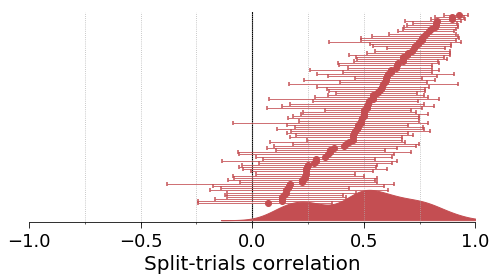

In [36]:
mean_xgb, low_xgb, high_xgb = get_CI_for_NS_halves_correlations(fit_halves, 'xgb')
plot_corr_scatter_control(mean_xgb, low_xgb, high_xgb, color = sns.color_palette(n_colors=4)[3],
                          label="NS (nonlinear)", #savename ='XGB_halves_control'
                         )

Population mean of 0.0689527295542 [-0.00895836  0.14797529]


NameError: global name 'all_null_dists' is not defined

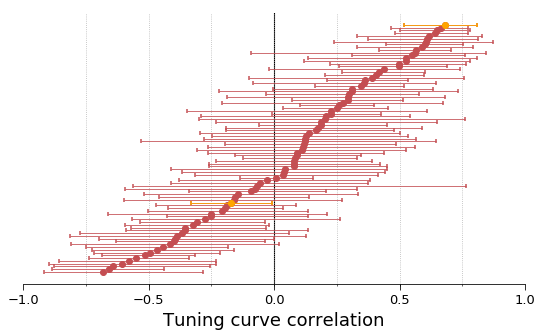

In [40]:
plot_corr_scatter_with_null(all_corrs,'xgb','art.',
                  color = sns.color_palette(n_colors=4)[3],
                  simcolor = sns.color_palette(n_colors=7)[-1],
                    simulated= mean_xgb,lower=-15,
                  save = False, percentile=5, xbins = 8.)

/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Population mean of 0.424249909313 (-0.033714258280955055, 0.96609649595272251)
('Worst 5 neurons: ', array([66, 35, 80,  2, 82]))


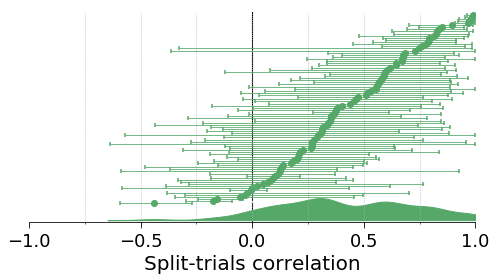

In [35]:
mean_glm, low_glm, high_glm = get_CI_for_NS_halves_correlations(fit_halves, 'glm_lowreg')
plot_corr_scatter_control(mean_glm, low_glm, high_glm, color = sns.color_palette(n_colors=4)[2],
                         label="NS (LNP)", #savename ='GLM_halves_control'
                         )

/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 223 but corresponding boolean dimension is 90


Population mean of 0.00906437191473 [-0.05136978  0.06454071]


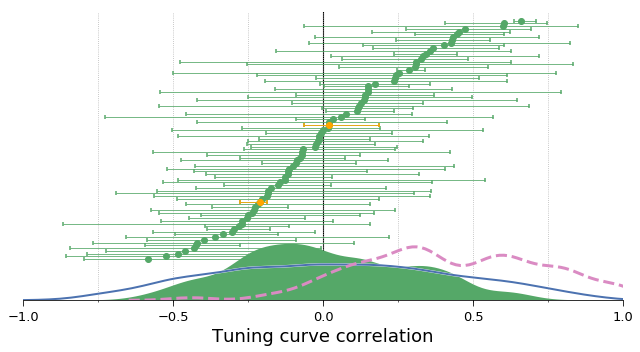

In [44]:
plot_corr_scatter_with_null(all_corrs,'glm_lowreg','art.',
                  color = sns.color_palette(n_colors=4)[2],
                  simcolor = sns.color_palette(n_colors=7)[-1],
                    simulated= mean_glm,lower=-15,
                  save = False, percentile=5, xbins = 8., mean_WFH_corrs = mean_corrs)

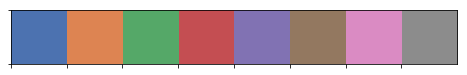

In [242]:
sns.palplot(sns.color_palette(n_colors=8))

Now the originals with the bound indicated

In [41]:
def plot_corr_scatter_with_bound(all_corrs, method1, method2,
                                 mean_corrs, low_corrs, high_corrs,
                                 color = None,savename=False, percentile =5, mean_WFH_corrs = None):
    all_corrs_for_these_two = all_corrs.loc[method1,method2]
    mean = np.nanmean(all_corrs_for_these_two,axis=0)
    try:
        low, high = CI_along_axis0_nan(all_corrs_for_these_two,percentile)
    except ValueError:
        method2,method1 = method1, method2
        all_corrs_for_these_two = all_corrs.loc[method1,method2]
        mean = np.nanmean(all_corrs_for_these_two,axis=0)
        low, high = CI_along_axis0_nan(all_corrs_for_these_two,percentile)
#         stds=np.nanstd(vals,axis=0)[:,i]*1.96
    if ('glm' in method1) or ('glm' in method2):
        good_GLM_neurons = ~np.isnan(mean)
        mean = mean[good_GLM_neurons]
        low = low[good_GLM_neurons]
        high = high[good_GLM_neurons]
        
        
    if mean_WFH_corrs is not None:
        tuned_neurons = mean_WFH_corrs > 0
        mean = mean[tuned_neurons]
        low = low[tuned_neurons]
        high = high[tuned_neurons]
        all_corrs_for_these_two =  all_corrs_for_these_two[tuned_neurons]

    ybins = 16.
    xbins = 16.
    lower=-8

    print("Population mean of {} {}".format(np.nanmean(all_corrs_for_these_two),
                                            bootstrap_nan(np.nanmean(all_corrs_for_these_two,axis=0))))
    
    plt.figure(figsize=(8,5))
    if color == None:
        color = sns.color_palette(n_colors=3)[0]
        
        


    y_jitter = 0.2*np.random.randn(len(mean))
#     y = y_jitter + return_number_in_bin(mean, bins = ybins)
    y = np.argsort(mean)
    plt.errorbar(mean[y],range(len(y)), fmt= 'o',
        xerr = [mean[y]-low[y], high[y]-mean[y]],
       elinewidth = .8, capsize=2,capthick=1.5, color = color)
    
    
        # the upper bounds
    plt.errorbar(mean_corrs[y],range(len(y)), fmt= 'o', color = 'orange',
#         xerr = [mean_corrs[y]-low_corrs[y], high_corrs[y]-mean_corrs[y]],
                )

#     special neurons
    
#     plt.errorbar(mean[17:19],[np.argwhere(y==17)[0,0],np.argwhere(y==18)[0,0]], fmt= 'o',
#         xerr = [mean[17:19]-low[17:19], high[17:19]-mean[17:19]],
#        elinewidth = .8, capsize=2,capthick=1.5, color='orange',zorder=3)

    ax = plt.gca()

    plt.xlim([-1,1])
    # the grid lines
    ax.set_xticks(np.arange(-1+2/xbins,1,2/xbins, ), minor=True)
    ax.axvline(ymin=lower, ymax = len(mean), c='k', zorder = 0, linewidth = 1.1)
    plt.grid(which = 'minor', linestyle=':')


    plt.xticks(fontsize= 13)
    plt.xlabel('Tuning curve correlation', fontsize=14)


    simpleaxis(ax)
    ax.spines['left'].set_visible(False)
    plt.yticks([])

    # the lower density plot
    ax = sns.kdeplot(mean,shade=True,ax=ax, color='w',bw=.07 ,zorder=0)
    
    
    plt.ylim(lower-1
             ,len(y))
    line = ax.get_lines()[-1]
    x, y_ = line.get_data()
    
    ax.fill_between(x, y1=lower+-lower*y_, y2=lower, alpha=1, facecolor=color)
    
    plt.tight_layout()
    if savename:
        plt.savefig("final_figures/{}.pdf".format(savename),format='pdf')
    plt.show()
    return mean[y], mean_corrs[y], -low[y] + high[y]

In [ ]:
def get_wilcoxon_change_bootstrapped(all_corrs, method1, method2,
                                     mean_corrs, low_corrs, high_corrs,
                                 ):
    #correlations of bootstrapped curves
    all_corrs_for_these_two = all_corrs.loc[method1,method2]
    
    # a correlation of bootstrapped split-trials
    for neuron_id in range(90):
    corr_list = []
    for nc in range(len(fit_halves)):
        # these are the two curves
        plain_predicted1 = fit_halves[nc][method][neuron_id]['plain_predicted_spike_counts_half1']
        plain_predicted2 = fit_halves[nc][method][neuron_id]['plain_predicted_spike_counts_half2']
        hues = fit_halves[nc][method][neuron_id]['plain_hue']

        #now bin
        bin_means1, bin_edges1, binnumber1 = stats.binned_statistic(hues,plain_predicted1, bins = 16)
        bin_means2, bin_edges1, binnumber1 = stats.binned_statistic(hues,plain_predicted2, bins = 16)
        hues = bin_edges1[1:] - (bin_edges1[1] - bin_edges1[0])/2
        # now correlate
        this_corr_coef = np.corrcoef(bin_means1, bin_means2)[0,1]
        corr_list.append(this_corr_coef)
    

/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 223 but corresponding boolean dimension is 90


Population mean of 0.00906437191473 [-0.04962447  0.06730192]


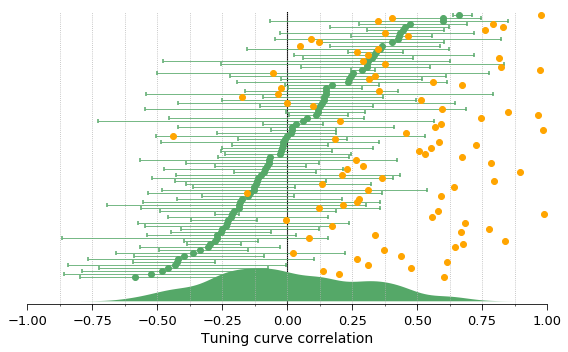

In [44]:
wfh_ns_glm, ns_ns_glm, bound_ns_ns_glm = plot_corr_scatter_with_bound(all_corrs,'glm_lowreg','art.',
                mean_glm, low_glm, high_glm,
                   color = sns.color_palette(n_colors=4)[2],
                  savename = "GLM_control_with_bound", percentile=5,
                                     mean_WFH_corrs = mean_corrs)

/opt/anaconda/anaconda2/envs/V4/lib/python2.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 223 but corresponding boolean dimension is 90


Population mean of 0.0659487626325 [-0.00505573  0.1419379 ]


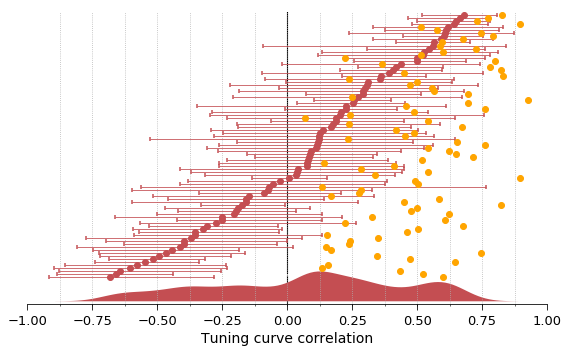

In [55]:
wfh_ns_xgb, ns_ns_xgb, bound_ns_ns_xgb = plot_corr_scatter_with_bound(all_corrs,'xgb','art.',
                mean_xgb, low_xgb, high_xgb,
                   color = sns.color_palette(n_colors=4)[3],
                   savename = "XGB_control_with_bound", percentile=5, mean_WFH_corrs = mean_corrs)

In [57]:
from scipy.stats import wilcoxon
print("GLM: Wilcoxon: different from split-trial control, {} p={}".format(
                                                        *wilcoxon(ns_ns_glm,wfh_ns_glm)))
print("XGB: Wilcoxon: different from split-trial control, {} p={}".format(
                                                        *wilcoxon(ns_ns_xgb,wfh_ns_xgb)))

GLM: Wilcoxon: different from split-trial control, 283.0 p=3.18220432266e-12
GLM: Wilcoxon: different from split-trial control, 98.0 p=1.00050997793e-14


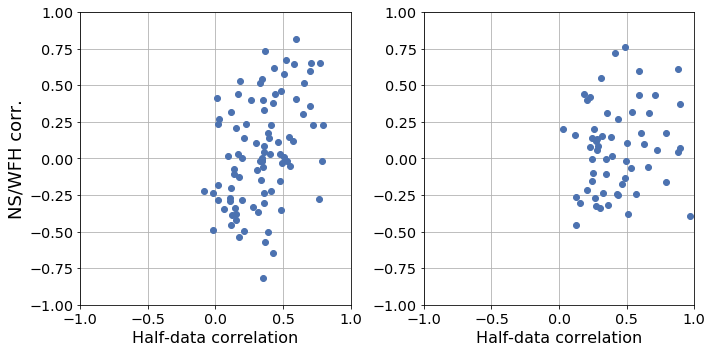

In [542]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(ns_ns_xgb, wfh_ns_xgb, 'o')
plt.axis([-1,1,-1,1])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
plt.ylabel("NS/WFH corr.",fontsize=18)
plt.subplot(122)
plt.plot(ns_ns_glm, wfh_ns_glm, 'o')
plt.axis([-1,1,-1,1])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
# plt.ylabel("95% - 5% bound on NS/WFH")
plt.tight_layout()
plt.savefig('final_figures/supp_fig_halves_control/corr_vs_corr.pdf')
plt.show()

#### Prediction: on those trials for which the NS self-correlation-for-half-data is low, we should have a high uncertainty on the WFH/NS correlation.

This appears to be the case.

However, as seen above there is little correlation between the NS/NS correlation and the WFH/NS correlation – only upon the *uncertainty*. This is what we should expect.

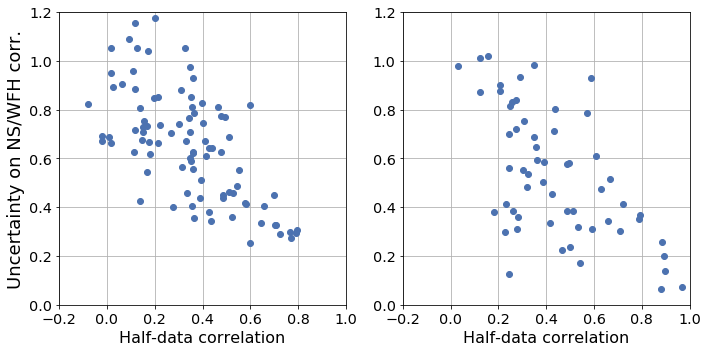

In [544]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(ns_ns_xgb, bound_ns_ns_xgb, 'o')
plt.axis([-.2,1,0,1.2])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
plt.ylabel("Uncertainty on NS/WFH corr.",fontsize=18)
plt.subplot(122)
plt.plot(ns_ns_glm, bound_ns_ns_glm, 'o')
plt.axis([-.2,1,0,1.2])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
# plt.ylabel("95% - 5% bound on NS/WFH")
plt.tight_layout()
plt.savefig('final_figures/supp_fig_halves_control/bound_vs_corr.pdf')
plt.show()

In [58]:
def get_slopes(neuron_id, diff_dataframe, nbins = 8,
              sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1],
              ids = 'all', plot = False):
    """runs linear regression on the desaturation plot.
    regresses over all images for good error propagation.
    
    If ids is not None, it is a list of indexes over which to get the slopes."""
    
    slopes = []
    errs = []
    rsqs  =[]
    if plot:
#         plt.figure(figsize = (6,4))
        colors = []

    for hue in range(1,nbins+1):
        diffs = []
        stds=[]
        allpoints = []
        allsats = []
       
        for sat in sats[:-1]:
            if sat==0:
                a = diff_dataframe.loc[neuron_id,'vgg.l6.lacking' + str(hue)]
                
            else:
                a =diff_dataframe.loc[neuron_id,'vgg.l6.sat_'+str(sat)+'_bin_' + str(hue)]
            if not (ids is 'all'):
                a = a[ids]
            a = a[a**2<100]  
            diffs.append(a.mean())
            stds.append(a.std())
            allpoints.append(a)
            allsats.append(sat*np.ones(a.shape))   
            
        allpoints = np.hstack(allpoints)
        allsats = 100*(1-np.hstack(allsats))
        # get slope
        res = sm.OLS(allpoints, allsats).fit()
        slope = res.params[0]
        err = res.conf_int()[0]
        
        diffs.append(0)
        stds.append(0)
        
        rsqs.append(res.rsquared)
        slopes.append(slope)
        errs.append(err)
        if plot:
            n = len(a)
            sats_, diffs, stds = (1-np.array(sats))*100,np.array(diffs), np.array(stds)/np.sqrt(n)

            h = (hue)/8.
            c =np.roll(sns.color_palette(palette = 'hls', n_colors=8, desat=1),4)[hue-1]

            plt.plot(sats_, diffs,'-o', c=c)
            plt.fill_between(sats_, diffs-stds, diffs+stds,alpha = 0.4, color = c)
            colors.append(c)
        
    if plot:
        simpleaxis(plt.gca())
        plt.xlabel('Percent Desaturated', fontsize = 16)    
        plt.ylabel('Average difference of predictions', fontsize = 16)
        plt.tight_layout()

    #     plt.savefig('final_figures/saturation_dependence_{}.pdf'.format(neuron_id))
#         plt.show()
    return np.array(slopes), np.array(errs), np.array(rsqs)

In [59]:
## now for the VGG methods
diff_df_all_halves =  pd.read_pickle('diff_df_2cv_all.p')
diff_df_all =  pd.read_pickle('desat_diff_from_sat_predictions_real_XGB.pickle')

In [60]:
# get the splitter
skfs2cv = pickle.load(
    open("skfs_2cv_all.p","rb"))


In [61]:
def get_CI_for_NS_halves_correlations_VGG(diff_df_all_halves, skfs, plot = False, n_iters = 100):
    mean_corrs = []
    lows = []
    highs = []
    for neuron_id in range(90):
        skf = skfs[neuron_id]
        corr_list = []
                                       
        ids1,ids2 = list(skf)[0]
        # these are the two curves
        if plot:
            print("Neuron",neuron_id)

            plt.figure(figsize = (15,4))
            plt.subplot(131)
            slopes1, errs,_ = get_slopes(neuron_id, diff_df_all_halves, nbins = 8,
              sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1],
              ids = 'all', 
              plot = True)
            plt.subplot(132)
            slopes1, errs,_ = get_slopes(neuron_id, diff_df_all_halves, nbins = 8,
              sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1],
              ids = ids2, 
              plot = True)
            plt.subplot(133)
            slopes, errs,_ = get_slopes(neuron_id, diff_df_all, nbins = 8,
              sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1],
              plot = True)
            plt.tight_layout()
            plt.show()
                # jitter around
        else:
            slopes1, errs1,_ = get_slopes(neuron_id, diff_df_all_halves, nbins = 8,
              sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1],
              ids = ids2, 
              plot = False)
       
        
        slopes2, errs2,_ = get_slopes(neuron_id, diff_df_all_halves, nbins = 8,
          sats = [0,.1, 0.2, 0.3, 0.4, .5, .6,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1],
          ids = ids1)
        
        for n in range(n_iters):
                    # jitter around slopes. Errs are the 95% conf int of the slopes, so we convert to variance
            noised_slopes1 = slopes1+ np.array([np.random.normal(scale=(slopes1[i]-errs1[i,0])/1.96)
                                                  for i in range(len(slopes1))])
            noised_slopes2 = slopes2+ np.array([np.random.normal(scale=(slopes2[i]-errs2[i,0])/1.96)
                                                  for i in range(len(slopes2))])
        

            # now correlate
            this_corr_coef = np.corrcoef(noised_slopes1, noised_slopes2)[0,1]
            corr_list.append(this_corr_coef)

        # now get the CI
        low,high = CI_along_axis0(corr_list)
        mean_corrs.append(np.nanmean(corr_list))
        lows.append(low)
        highs.append(high)
        
    
    return np.array(mean_corrs), np.array(lows), np.array(highs)

In [62]:
mean_vgg, low_vgg, high_vgg = get_CI_for_NS_halves_correlations_VGG(diff_df_all_halves, skfs2cv)

In [229]:
all_half_data_corrs = pd.DataFrame(index = ["vgg", "xgb","glm","wfh"], 
                                   columns = ["mean", "low", "high"],
                                   dtype = object)
all_half_data_corrs.loc['wfh'] = [mean_corrs, lows, highs]
all_half_data_corrs.loc['glm'] = [mean_glm, low_glm, high_glm]
all_half_data_corrs.loc['xgb'] = [mean_xgb, low_xgb, high_xgb]
all_half_data_corrs.loc['vgg'] = [mean_vgg, low_vgg, high_vgg]

all_half_data_corrs.to_pickle("all_half_data_corrs.p")


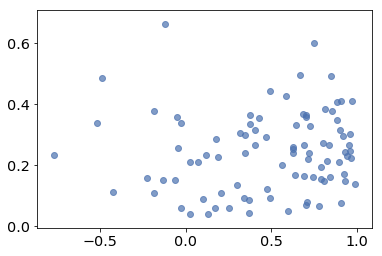

In [27]:
pr2_vgg = np.array(pickle.load(open( "VGG_M3_pr2.p", "rb" ) ))
plt.scatter(mean_vgg, np.mean(pr2_vgg,axis=1), alpha = 0.7)

Population mean of 0.483564798764 (-0.22339788137575703, 0.9588272041139646)
('Worst 5 neurons: ', array([13, 87,  1, 19, 72]))


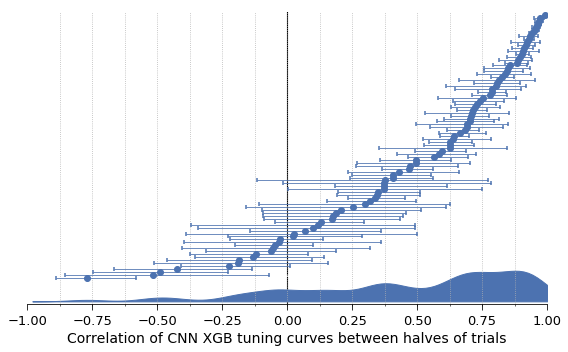

In [29]:
plot_corr_scatter_control(mean_vgg, low_vgg, high_vgg, #color = sns.color_palette(n_colors=4)[3],
                          label="CNN XGB", savename ='VGG_halves_control'
                         )

Population mean of 0.14566378421 [ 0.06356117  0.22373997]


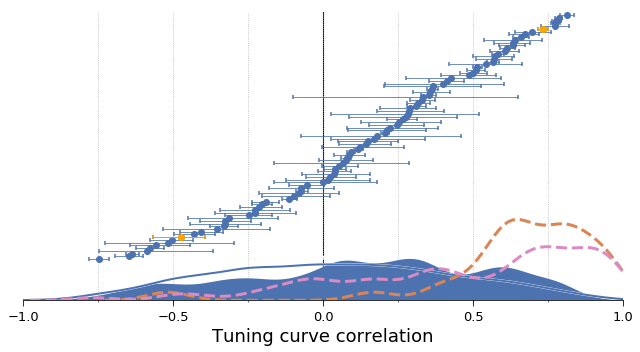

In [269]:
plot_corr_scatter_with_null(all_corrs,'VGG','art.',
                  color = sns.color_palette(n_colors=4)[0],
                simulated= sim_corrs,null=True,
                   simcolor2 = sns.color_palette(n_colors=7)[-1],
                    simulated2= mean_vgg,
                            lower=-15,
                  save = True, percentile=5, xbins = 8.)

Population mean of 0.136292261444 [ 0.05788852  0.21646467]


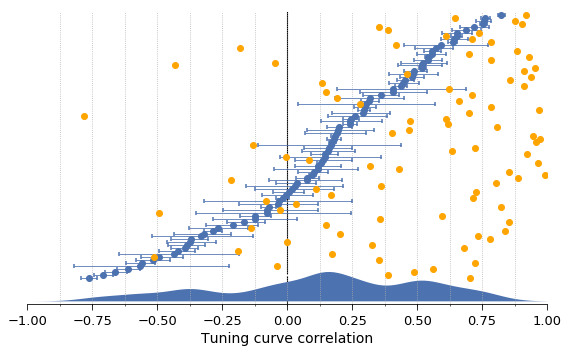

In [63]:
wfh_ns_vgg, ns_ns_vgg, bound_ns_ns_vgg = plot_corr_scatter_with_bound(all_corrs,'VGG','art.',
              mean_vgg, low_vgg, high_vgg,
#                    color = sns.color_palette(n_colors=4)[2],
                  savename = "VGG_control_with_bound", percentile=5)

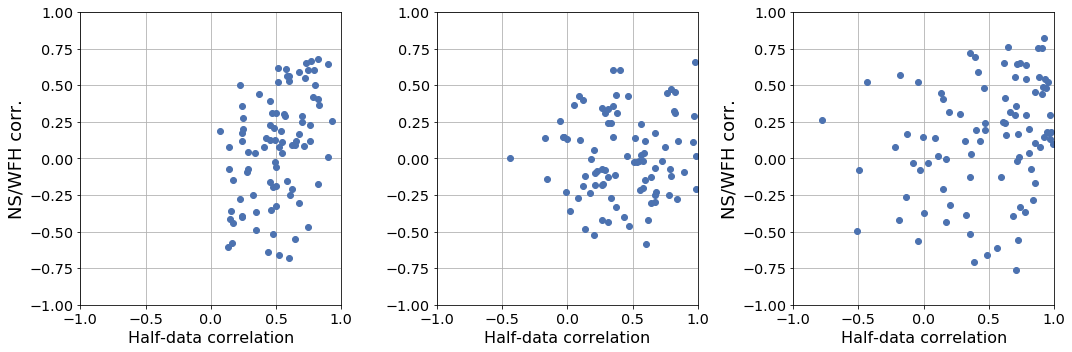

In [64]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(ns_ns_xgb, wfh_ns_xgb, 'o')
plt.axis([-1,1,-1,1])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
plt.ylabel("NS/WFH corr.",fontsize=18)
plt.subplot(132)
plt.plot(ns_ns_glm, wfh_ns_glm, 'o')
plt.axis([-1,1,-1,1])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
# plt.ylabel("95% - 5% bound on NS/WFH")
plt.subplot(133)
plt.plot(ns_ns_vgg, wfh_ns_vgg, 'o')
plt.axis([-1,1,-1,1])
ax = plt.gca()
# simpleaxis(ax)
plt.grid()
plt.xlabel("Half-data correlation", fontsize = 16)
plt.ylabel("NS/WFH corr.",fontsize=18)
plt.tight_layout()
# plt.savefig('final_figures/supp_fig_halves_control/corr_vs_corr_vgg.pdf')
plt.show()


In [65]:
print("GLM: Wilcoxon: different from split-trial control, {} p={}".format(
                                                        *wilcoxon(ns_ns_vgg,wfh_ns_vgg)))

GLM: Wilcoxon: different from split-trial control, 629.0 p=1.14578593671e-08


In [71]:
def prep_data_and_fit_neurons(df_neurons, df_data, model='XGB_poisson', session = 'art', 
                         nat_features = None, image_feature = 'hue.histogram', name  = None,
                         verbose = 0, plot=False, which_neurons = 'all',joint = False,
                         simulated_responses = None, image_categories = None, category = None,
                             lambd = 0, art_XGB = None, resample=False, fit_on_halves = False, 
                             cross_validate = True):
    """
    Master function to fit neural data with specified model and predict to one-hot hue vectors to build a tuning curve.
    
    This handles a lot of the tricky data preparation. For each neuron, it looks up which trials were valid
    (this is different per neuron because we throw out sessions in which we're suspicious of neural drift for that neuron)
    and then prepares the data vectors, calls a cross-validating fitting procedure to get the quality of fit,
    then refits that model to the entire data vector, then finally uses that model to predict to the one-hot hues.
    
    There are options in this function for a lot of the control analysis, like supplying simulated data instead of 
    using real neural data, as well as fitting two models fit on only half of the model.
    
    
    
    Inputs:
    ======
    df_neurons = dataframe with neural data
    df_data = dataframe with all data. Must contain 'session_number' column
    nat_features = precomputed natural features. Result of get_nat.features
                        Required when session = 'nat'.
    
    Options:
    ========
    image_feature = {hue.histogram, hue.mean, vgg.l8, vgg.l7, vgg.l6, vgg.l5}
                        What feature to use for the natural images. 
                        Required when session = 'nat'.
                        
    model = what algorithm to feed to fit_cv 
    session = {'art', 'nat'} Which session type to fit to
    plot = {True, False} Whether to plot the fits
    verbose = {0,1,2} how much to print
    which_neurons = 'all', or list of indices of neurons to fit (in case you want just one, say)
    joint = whether to use non-images features too
    simulated_responses = list of neuron's responses. 
    valid_images = boolean vector of length nat_features.index
    resample = whether to fit to a random sample of trials, sampled with replacement
    fit_on_halves = when fitting the final model for the tuning curve analysis, 
    
    Outputs:
    ========
    df_fits: A dataframe with a single column listing, for each neuron, a dictionary with 4 value/key pairs:
    'hue', 'spike_counts', 'predicted_spike_counts', 'pseudo_R2'
    
    """
    assert session in ['art', 'nat']
    assert model in ['XGB_poisson', 'GLM_poisson','linear_regression','fitted_keras','art_model','art_model_mean_corrected']
    # handle situation where we're using the mean-firing-rate corrected art. tuning curves as the model on nat. scenes
    correct_mean = False
    if model == 'art_model_mean_corrected':
        correct_mean = True
        model = 'art_model'
        
    if session is 'nat':
        assert nat_features is not None
        assert image_feature in \
             ['hue.histogram', 'hue.mean', 'vgg.l8', 'vgg.l7', 'vgg.l6', 'vgg.l5']
    if model is 'fitted_keras':
        assert image_feature in ['vgg.l8', 'vgg.l7', 'vgg.l6', 'vgg.l5'] and session is 'nat'
    if model is 'art_model':
        assert image_feature == 'hue.histogram'
        assert art_XGB is not None
            
    if which_neurons is 'all':
        which_neurons = np.arange(len(df_neurons['name']))
    elif isinstance(which_neurons,int):
        which_neurons = [which_neurons]
        
    if image_categories is not None:
        assert image_categories.shape == (len(nat_features),)
        
    if name is None:
        name = session+'_'+model+'_'+image_feature
        
    if (model is not 'fitted_keras'):
        cross_validate = False
    
    df_fits = pd.DataFrame(columns=[name])
    which_session = session + '_sessions'
    
    # Compute feed forward features for plain hue image
    if session == 'nat':
        plain_hue = np.linspace(-np.pi, np.pi, 360)
        if image_feature in ['vgg.l8', 'vgg.l7', 'vgg.l6', 'vgg.l5']:
            
            # build model
            
            if image_feature == 'vgg.l8':
                vgg_model= vgg_transfer_ari(n_pops=0)
                n_nodes = 1011
                if not joint: n_nodes = 1000
            elif image_feature == 'vgg.l7':
                vgg_model= vgg_transfer_ari(n_pops=1)
                n_nodes = 4107
                if not joint: n_nodes = 4096
            elif image_feature == 'vgg.l6':
                vgg_model= vgg_transfer_ari(n_pops=2)
                n_nodes = 4107
                if not joint: n_nodes = 4096
            elif image_feature == 'vgg.l5':
                vgg_model= vgg_transfer_ari(n_pops=3)
                n_nodes = 25099
                if not joint: n_nodes = 25088
            
            Xplain = list()
            stimpath = '../V4pydata'
            for stim_id in range(360):
                imname = '/stimuli/M3/Hues/img%03d.jpg' % stim_id
                filename = stimpath + imname
                I = load_and_preprocess_ari(filename)
                Xplain.append(np.squeeze(vgg_model.predict(I)))
            Xplain = np.array(Xplain)
            n_bins = Xplain.shape[1]
        elif image_feature == 'hue.histogram':
            # Define histograms of plain hue stimuli
            n_bins = 16
            Xplain = onehothue(plain_hue, n_bins=n_bins)
        elif image_feature == 'hue.mean':
            Xplain = plain_hue.reshape((360,1))
    
    ######### Get tuning curves for all neurons ###########

    for neuron_id, neuron_name in tqdm(enumerate(df_neurons['name'])):
        
        if neuron_id not in which_neurons:
            continue

        if verbose>0:
            print 'Running neuron ' + neuron_name


        ### Get proper X and Y data ~~~~~~~~~~~~~~~

        # Extract session numbers
        sessions_of_interest = df_neurons.loc[neuron_id][which_session]

        # Grab relevant data
        if session is 'art':
            
            df_sessions_of_interest = df_data.loc[df_data['session.number'].isin(sessions_of_interest)]
            
            covariates =  ['predictors.hue', 
                           'predictors.col', 
                           'predictors.row', 
                           'predictors.hue_prev', 
                           'predictors.stim_dur', 
                           'predictors.off_to_onset_times']

            # Get covariates
            X = df_sessions_of_interest[covariates].values  
            # for plotting
            x_data = df_sessions_of_interest['predictors.hue'].values

            
        else:  # get natural feature
            if image_categories is not None:
                in_category = nat_features['accepted_indices'].loc[image_categories==category]
            else:
                in_category = nat_features['accepted_indices']
            
            df_sessions_of_interest = df_data.loc[df_data['session.number'].isin(sessions_of_interest) & \
                                             df_data.index.isin(in_category)]
            #-----------------
            # Get covariates
            #-----------------
            # Select sessions of interest
            indices_of_interest = np.array(df_sessions_of_interest.index)
            nat_features_of_interest = \
                nat_features.loc[nat_features['accepted_indices'].isin(indices_of_interest)]

            # Convert everything to array

            n_samples = len(nat_features_of_interest)
            
            if n_samples < 100: 
                if verbose>0: print('skipped: ', neuron_id)
                #we'll add the neuron to the datafrom but without any of the features
                #df_fits.loc[neuron_id] = 'neuron_skipped'
                continue

            # Image features
            try: n_features = len(nat_features_of_interest['image_features']\
                             [nat_features_of_interest.index[0]][image_feature])
            except TypeError: # bad practice: assuming all errors will be for same reason. 

                n_features = 1

                    
            image_features_array = np.zeros((n_samples, n_features))
            image_features_list = [nat_features_of_interest['image_features'][k][image_feature] \
                                   for k in nat_features_of_interest.index]
            for k in range(n_samples):
                image_features_array[k, :] = image_features_list[k]

            # Non-image features
            n_features = np.shape(nat_features_of_interest['non_image_features']\
                                  [nat_features_of_interest.index[0]].values)[0]
            non_image_features_array = np.zeros((n_samples, n_features))
            non_image_features_list = [nat_features_of_interest['non_image_features'][k].values \
                                   for k in nat_features_of_interest.index]
            for k in range(n_samples):
                non_image_features_array[k, :] = non_image_features_list[k]
                
            # for plotting
                            # remember we're plotting as a function of HUE MEAN
            x_data = np.array([nat_features_of_interest['image_features'][k]['hue.mean'] \
                      for k in nat_features_of_interest.index])

            # Concatenate
            if joint:
                X = np.concatenate((image_features_array, 
                                   non_image_features_array), 
                                  axis=1)
            else:
                X = image_features_array



        # Labels and number of folds for stratified CV
        labels = df_sessions_of_interest['im.name']  if session is 'nat' else []
        labels = np.array(labels)
        n_cv = 8

        # Get spike counts
        Y = df_sessions_of_interest[neuron_name].values
        
        # Rescale by the stimulus duration for all methods
        if session == 'nat':
            col = np.argwhere(nat_features['non_image_features']\
                                      [0].keys() == 'predictors.fix_duration')[0,0]
            Y = Y/non_image_features_array[:,col]
            
        
        if simulated_responses is not None:
            sim_spikes = simulated_responses[neuron_id]
            assert sim_spikes.shape == Y.shape
            Y = sim_spikes
            

        if resample is True:
            X, Y, labels = bootstrap3(X,Y,labels)
            
        if fit_on_halves:
            """Split the data in half, deterministically,
            making sure that trials from the same image are in the same fold."""
            half1, half2 = list(LabelKFold(labels, n_folds=2))[0]
            
            X1, Y1, labels1 = X[half1],Y[half1],labels[half1]
            X2, Y2, labels2 = X[half2],Y[half2],labels[half2]
        
 
        #### Fit models ~~~~~~~~~~~~~~~~~
        my_model = None
        
        if model == 'art_model':
            # predictions from a fit tuning curve to artificial images
            from scipy.stats import binned_statistic
            def art_model(Xr,Yr,Xt,neuron_id=neuron_id,nbins=n_bins):
                assert nbins == Xr.shape[1]
                #get average spike rate in each bin
                hue = art_XGB.iloc[:,0][neuron_id]['hue']
                spikes =   art_XGB.iloc[:,0][neuron_id]['spike_counts']/\
                           art_XGB.iloc[:,0][neuron_id]['duration']
                        
                        
                bin_means, bin_edges, binnumber = binned_statistic(hue,spikes,statistic='mean',bins=nbins)
                
                # normalize histogram by number of pixels
                Xt_unit = Xt / np.linalg.norm(Xt)

                # return lin. comb.
                prediction =  np.dot(Xt_unit, np.reshape(bin_means,(nbins,1)))
                if correct_mean:
                    art_mean = np.mean(art_XGB.iloc[:,0][neuron_id]['spike_counts']/\
                       art_XGB.iloc[:,0][neuron_id]['duration'])
                    nat_mean = np.mean(Y)
                    
                    prediction += nat_mean - art_mean
                return prediction
            my_model = art_model
            
            
        if model == 'GLM_poisson':
            r = ro.r
            r.library('glmnet')
      
            def r_glmnet(Xr,Yr,Xt):
                yr = ro.FloatVector(Yr) # use factors
                trained_model = r['cv.glmnet'](Xr, yr, family="poisson",alpha=0.1,standardize=False)

                if lambd == 'min':
                    lambda_min = np.asanyarray(trained_model.rx2('lambda.min'))[0]
                else: 
                    lambda_min = np.asanyarray(trained_model.rx2('lambda.1se'))[0]
#                print(lambda_min)
                Yt = r['predict'](trained_model,s=lambda_min,newx=Xt,type="response")
                return np.array(list(Yt))
            my_model = r_glmnet
            model = 'myGLM'
                
        if cross_validate:   
            # can't used fitted keras to predict for images because it was fit on those!! will be overfit
            Yt_hat, pseudo_R2 = fit_cv(X, Y,
                                      stratify_by_labels=labels,
                                      n_cv=n_cv, epochs=50,batch_size=128,
                                      algorithm= model,model = my_model,
                                      verbose=verbose, lambd = lambd)
            
            
        if model == 'myGLM':
            model = 'GLM_poisson'
        
        ### Get tuning curves
        if session is 'nat' and model is not 'art_model':
            # Fit the  model
            if model == 'fitted_keras':
                model_instance = keras_GLM(n_nodes, 100)
                if joint:
                    model_instance.load_weights('../02-preprocessed_data/M3/fit_models/'\
                                           +str(neuron_id)+'_'+neuron_name+'_l6_joint')
                else:
                    model_instance.load_weights('../02-preprocessed_data/M3/fit_models/'\
                                           +str(neuron_id)+'_'+neuron_name+'_l6_image')
            elif model is not 'GLM_poisson':
                if fit_on_halves:
                    model_instance1 = fit(X1, Y1, algorithm=model,epochs=50,batch_size=128, lambd = lambd)
                    model_instance2 = fit(X2, Y2, algorithm=model,epochs=50,batch_size=128, lambd = lambd)
                else:
                    model_instance = fit(X, Y, algorithm=model,epochs=50,batch_size=128, lambd = lambd)
            
            ### Predict on plain hue stimuli ###
            if joint:
                 # use or no?
                random_resample = np.random.randint(0, n_samples, Xplain.shape[0])
                # set :Xplain.shape[0] below to random_resample if yes
                Xplain_augment = np.concatenate((Xplain, 
                                      non_image_features_array[:Xplain.shape[0], :]), axis=1)
            else:
                Xplain_augment = Xplain
            
            if fit_on_halves:
                if model == 'XGB_poisson':
                    Yplain_hat1 = model_instance1.predict(xgb.DMatrix(Xplain_augment))
                    Yplain_hat2 = model_instance2.predict(xgb.DMatrix(Xplain_augment))
                elif model is 'GLM_poisson':
                    Yplain_hat1 = r_glmnet(X1, Y1, Xplain_augment)
                    Yplain_hat2 = r_glmnet(X2, Y2, Xplain_augment)
                else:
                    Yplain_hat1 = model_instance1.predict(Xplain_augment)
                    Yplain_hat2 = model_instance2.predict(Xplain_augment)
                
            else:
                if model == 'XGB_poisson':
                    Yplain_hat = model_instance.predict(xgb.DMatrix(Xplain_augment))
                elif model is 'GLM_poisson':
                    Yplain_hat = r_glmnet(X, Y, Xplain_augment)
                else:
                    Yplain_hat = model_instance.predict(Xplain_augment)

        
        # plot responses. for natural images, it's response to images vs. average hue of image
        if plot:
            y_data = Y
            xlabel = 'hue'
            plot_xy(x_data=x_data, y_data=y_data,
                       y_model=Yt_hat,
                       lowess_frac=0.5, xlabel=xlabel, model_name=model, 
                       x_jitter_level=0., y_jitter_level=0.5, title = 'max')
            plt.show()
            
            
        temp = dict()
        temp['hue'] = x_data
        temp['spike_counts'] = Y
        
        if session == 'art':
            temp['duration'] = df_sessions_of_interest['predictors.stim_dur'].values
            temp['time_normalized_counts'] = Y/df_sessions_of_interest['predictors.stim_dur'].values
            
        
        if cross_validate:
            temp['predicted_spike_counts'] = np.squeeze(Yt_hat)
            temp['pseudo_R2'] = pseudo_R2
                     
        if session is 'nat' and model is not 'art_model':
            temp['plain_hue'] = plain_hue
            
            if fit_on_halves:
                temp['plain_predicted_spike_counts_half1'] = np.squeeze(Yplain_hat1)
                temp['plain_predicted_spike_counts_half2'] = np.squeeze(Yplain_hat2)
            else:
                temp['plain_predicted_spike_counts'] = np.squeeze(Yplain_hat)
        
        df_fits.loc[neuron_id] = [temp]
        
    return df_fits